<a href="https://colab.research.google.com/github/ThierrryScotto/trabalho_pratico/blob/main/EDA_heat_and_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/datasets_prontos/dataset_with_geographic_data.csv'

dataset = pd.read_csv(url)

dataset

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,...,lag_heat_index_2,lag_heat_index_3,hospitalizations,average_stay,deaths,mortality_rate,deforestation,primary_forest_loss,favela,urbanized_area
0,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,...,23.427742,21.801111,4266,6.1,242,5.67,6164,150,1865,1865
1,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,...,26.305667,23.427742,4032,5.9,218,5.41,6390,201,1903,14972
2,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,...,30.079677,26.305667,3888,5.8,217,5.58,6390,201,1903,14972
3,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,...,31.907742,30.079677,3658,5.8,176,4.81,6390,201,1903,14972
4,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,...,32.959643,31.907742,4022,5.8,256,6.36,6390,201,1903,14972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-08,22.680968,5.464467,22.86,52.13,1.62,32.3,15.2,703.11,31.335,...,21.014000,23.174194,3768,6.9,344,9.13,8843,12,2133,16874
273,2023-09,23.058000,5.559752,22.70,69.97,1.69,34.9,15.6,691.74,33.460,...,19.769677,21.014000,3606,6.9,329,9.12,8843,12,2133,16874
274,2023-10,23.510645,3.787990,23.30,63.58,1.84,31.6,16.9,728.83,29.465,...,22.680968,19.769677,3697,7.5,341,9.22,8843,12,2133,16874
275,2023-11,26.595000,3.669000,25.96,61.17,1.65,33.5,19.9,797.85,31.954,...,23.058000,22.680968,3543,7.3,342,9.65,8843,12,2133,16874


In [3]:
dataset["date"] = pd.to_datetime(dataset["date"], format="%Y-%m")
dataset = dataset.set_index("date")

dataset

,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,percentil_99,...,lag_heat_index_2,lag_heat_index_3,hospitalizations,average_stay,deaths,mortality_rate,deforestation,primary_forest_loss,favela,urbanized_area
date,,,,,,,,,,,,,,,,,,,,,
2000-12-01,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,38.5520,...,23.427742,21.801111,4266,6.1,242,5.67,6164,150,1865,1865
2001-01-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,39.5900,...,26.305667,23.427742,4032,5.9,218,5.41,6390,201,1903,14972
2001-02-01,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,38.8030,...,30.079677,26.305667,3888,5.8,217,5.58,6390,201,1903,14972
2001-03-01,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,37.7400,...,31.907742,30.079677,3658,5.8,176,4.81,6390,201,1903,14972
2001-04-01,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,32.1117,...,32.959643,31.907742,4022,5.8,256,6.36,6390,201,1903,14972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,22.680968,5.464467,22.86,52.13,1.62,32.3,15.2,703.11,31.335,33.0020,...,21.014000,23.174194,3768,6.9,344,9.13,8843,12,2133,16874
2023-09-01,23.058000,5.559752,22.70,69.97,1.69,34.9,15.6,691.74,33.460,36.6514,...,19.769677,21.014000,3606,6.9,329,9.12,8843,12,2133,16874
2023-10-01,23.510645,3.787990,23.30,63.58,1.84,31.6,16.9,728.83,29.465,32.1660,...,22.680968,19.769677,3697,7.5,341,9.22,8843,12,2133,16874


# EDA

## Contantes

In [4]:
features = dataset.columns[1:]

features

Index(['standard_deviation', 'mean_temperature', 'mean_humidity',
       'mean_wind_speed', 'max_temperature', 'min_temperature',
       'sum_heat_index', 'percentil_95', 'percentil_99', 'lag_heat_index_1',
       'lag_heat_index_2', 'lag_heat_index_3', 'hospitalizations',
       'average_stay', 'deaths', 'mortality_rate', 'deforestation',
       'primary_forest_loss ', 'favela', 'urbanized_area'],
      dtype='object')

In [5]:
features_inmet = ['heat_index', 'standard_deviation', 'mean_temperature',
       'mean_humidity', 'mean_wind_speed', 'max_temperature',
       'min_temperature', 'sum_heat_index', 'percentil_95', 'percentil_99',
       'lag_heat_index_1', 'lag_heat_index_2', 'lag_heat_index_3']

features

Index(['standard_deviation', 'mean_temperature', 'mean_humidity',
       'mean_wind_speed', 'max_temperature', 'min_temperature',
       'sum_heat_index', 'percentil_95', 'percentil_99', 'lag_heat_index_1',
       'lag_heat_index_2', 'lag_heat_index_3', 'hospitalizations',
       'average_stay', 'deaths', 'mortality_rate', 'deforestation',
       'primary_forest_loss ', 'favela', 'urbanized_area'],
      dtype='object')

In [6]:
features_datasus = ['hospitalizations', 'average_stay', 'deaths', 'mortality_rate']

features_datasus

['hospitalizations', 'average_stay', 'deaths', 'mortality_rate']

In [7]:
features_map_biomas = ['deforestation', 'primary_forest_loss ', 'favela', 'urbanized_area']

features_map_biomas

['deforestation', 'primary_forest_loss ', 'favela', 'urbanized_area']

## Funções

In [8]:
def plot(x, y, title, x_label, y_label, rotation=45, figsize=(15, 4)):
    plt.figure(figsize=figsize)
    plt.plot(x, y, label=y_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

In [9]:
def scatter_plot(x, y, title, x_label, y_label, rotation=45, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation)
    plt.show()

In [46]:
def boxplot(x, labels, title, y_label, rotation=None, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    plt.boxplot(x, labels=labels)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation) if rotation else None
    plt.show()

## Exploração e visualização de dados

### Plot features meteorológicas

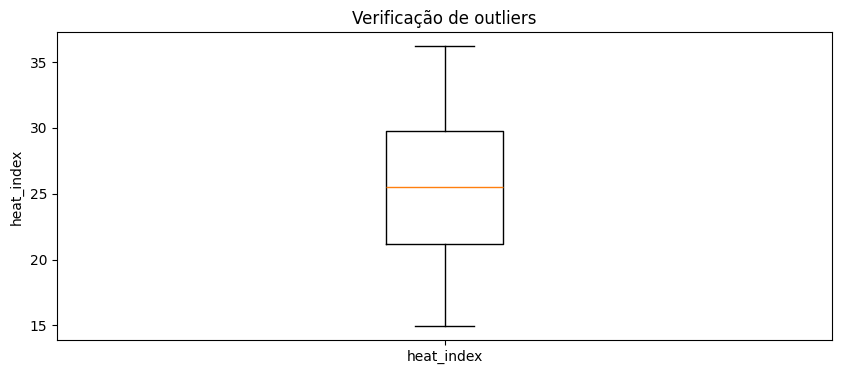

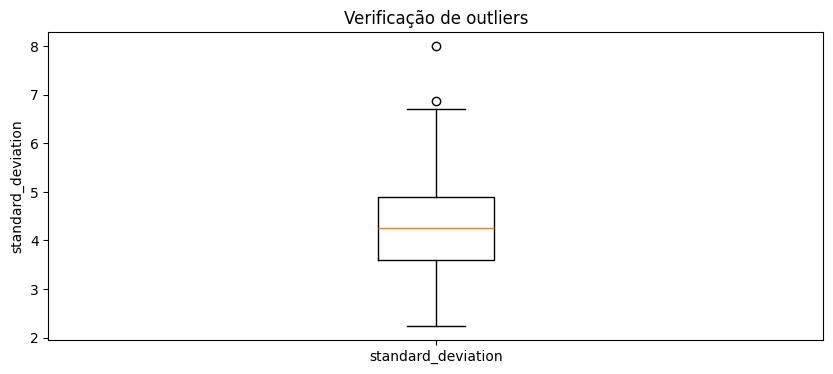

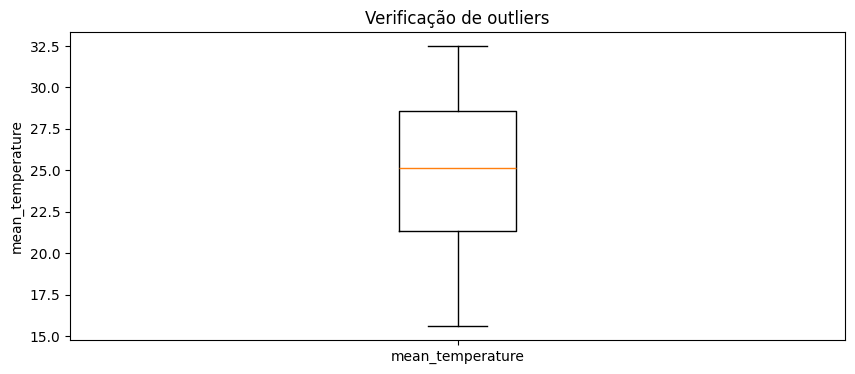

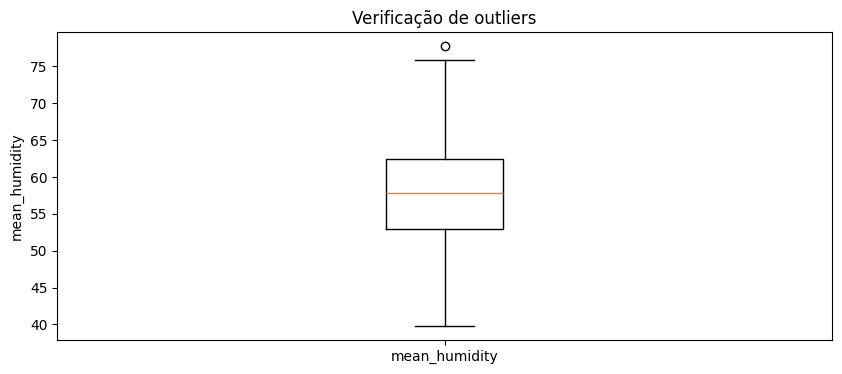

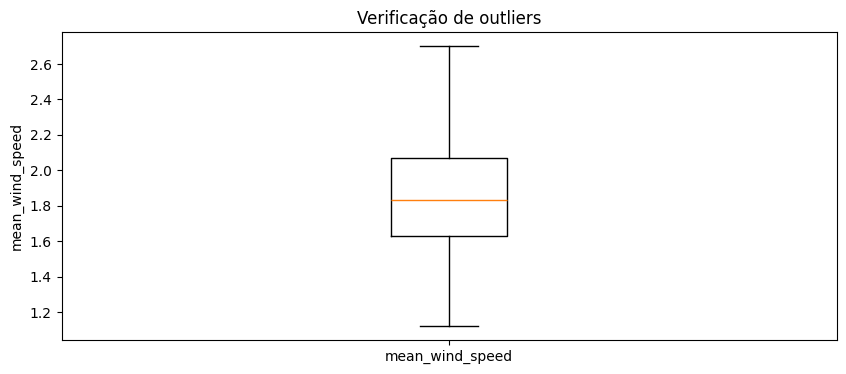

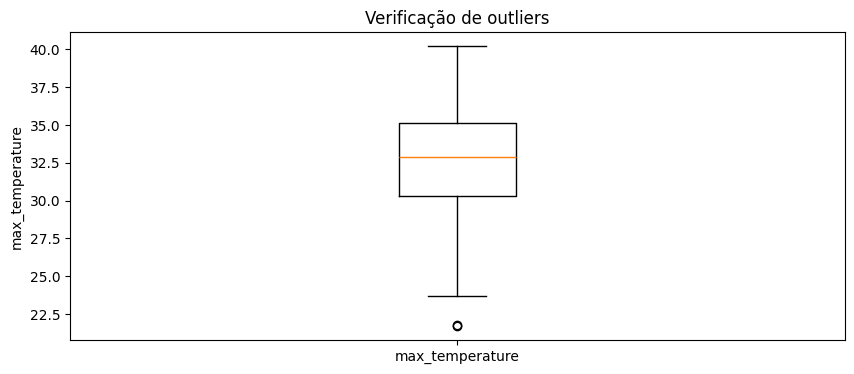

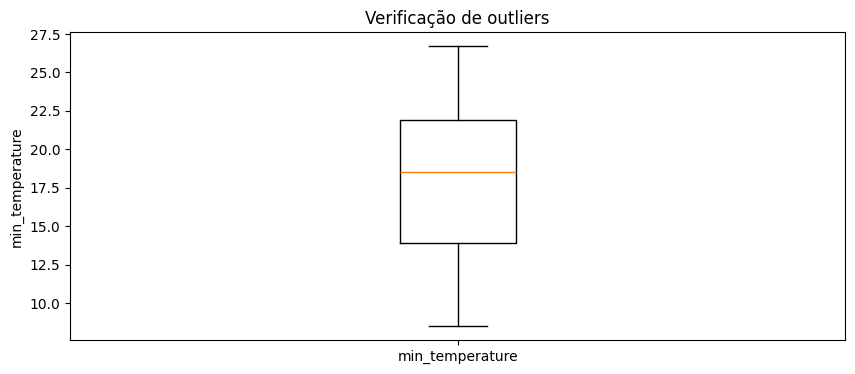

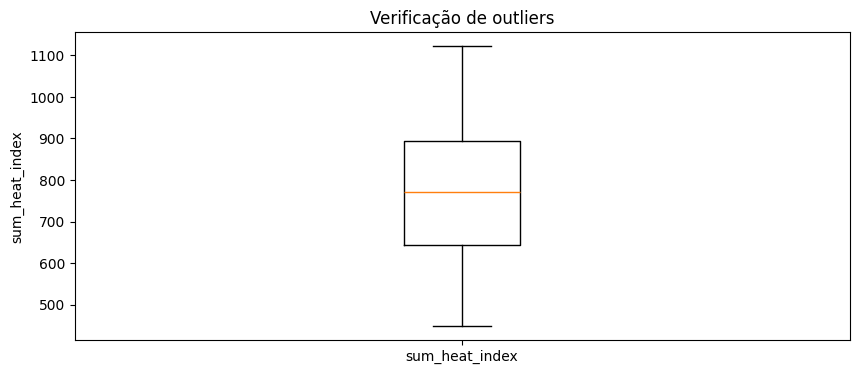

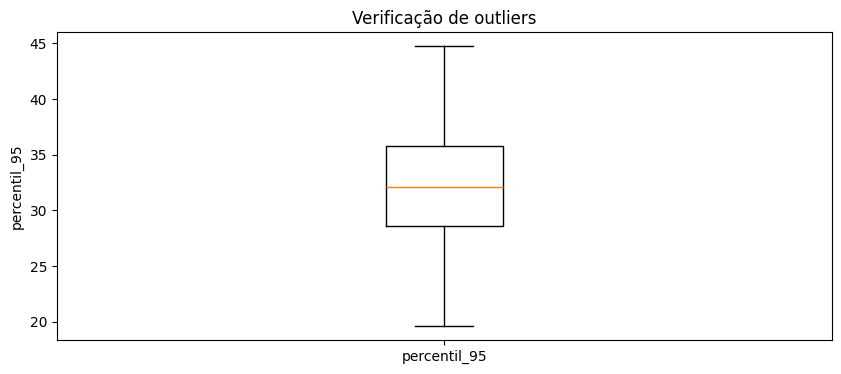

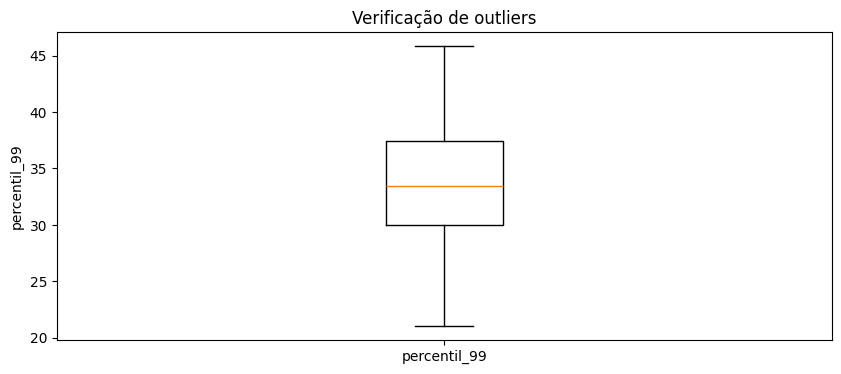

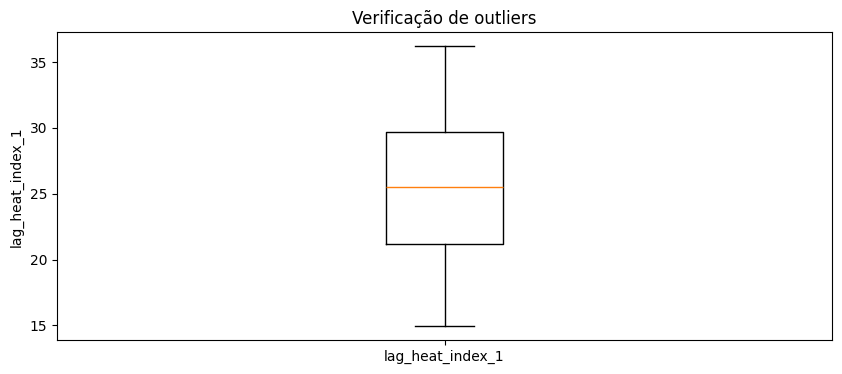

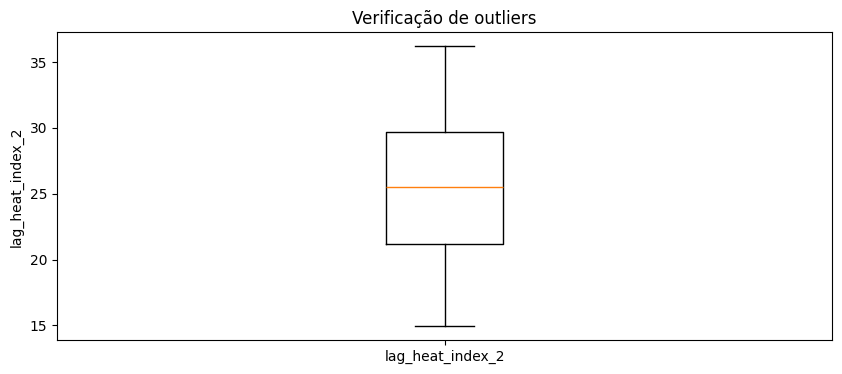

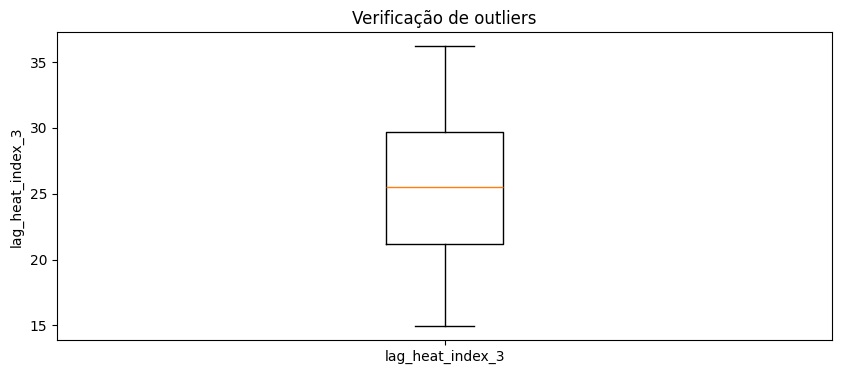

In [49]:
for feature in features_inmet:
    boxplot(dataset[feature], [feature], "Verificação de outliers", feature, figsize=(10, 4))

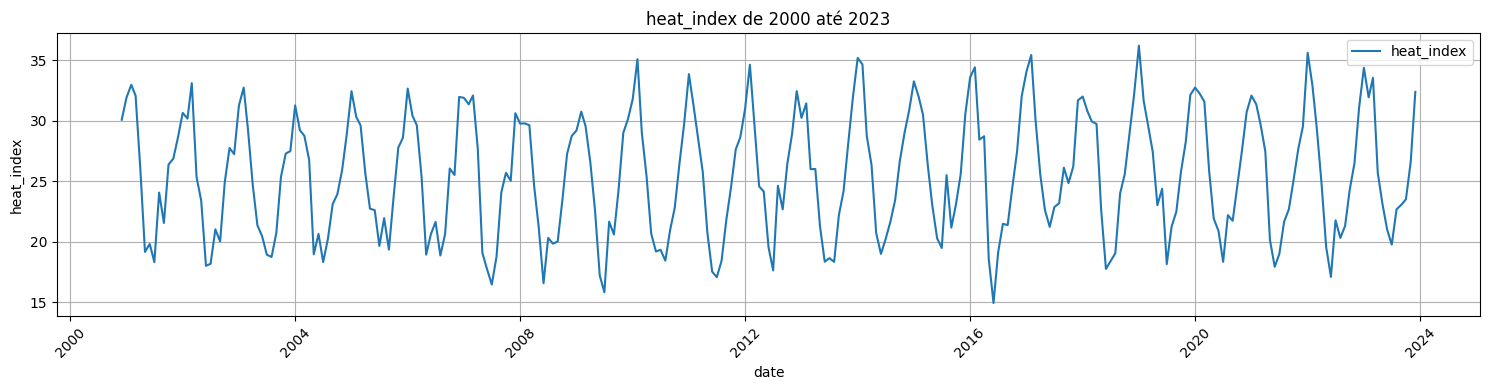

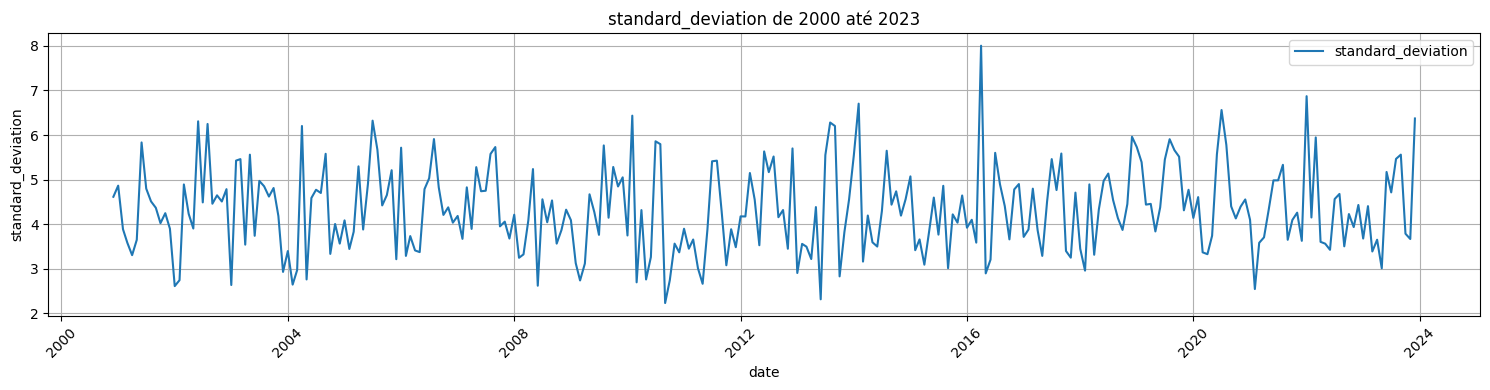

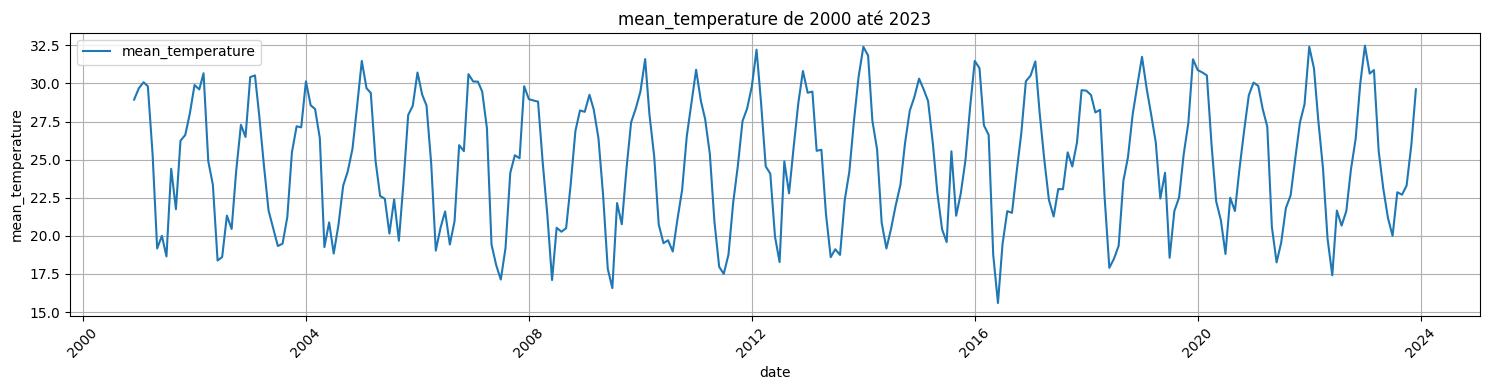

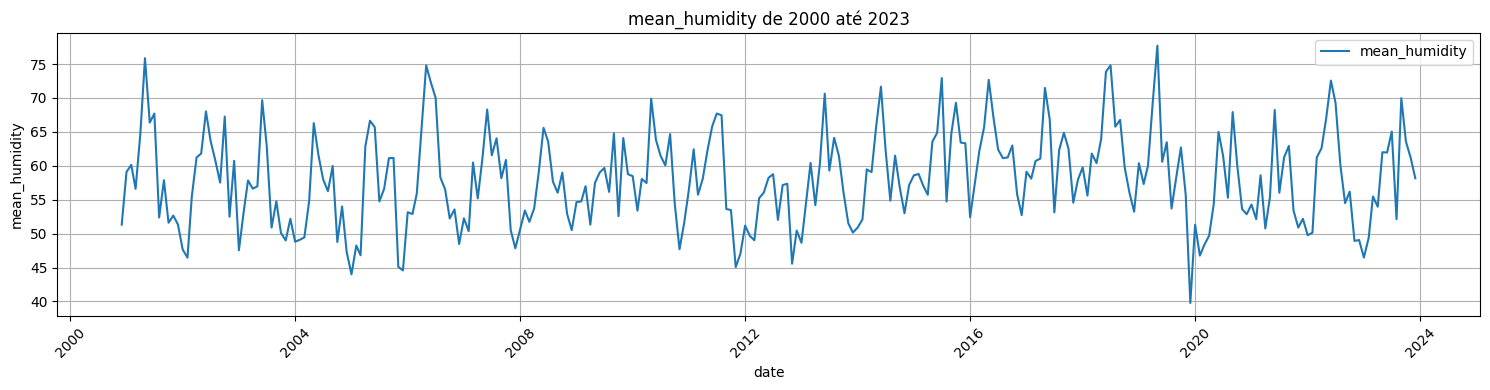

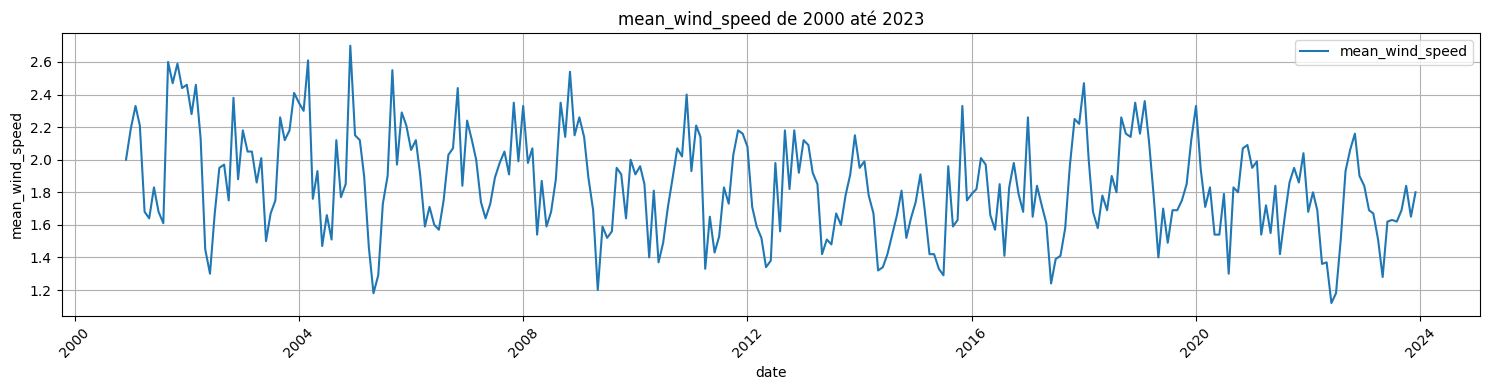

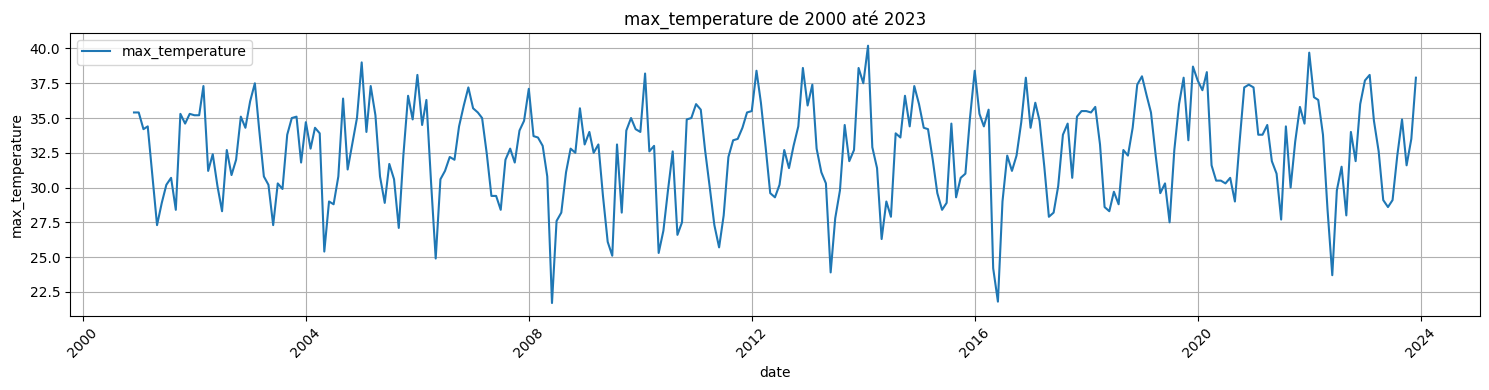

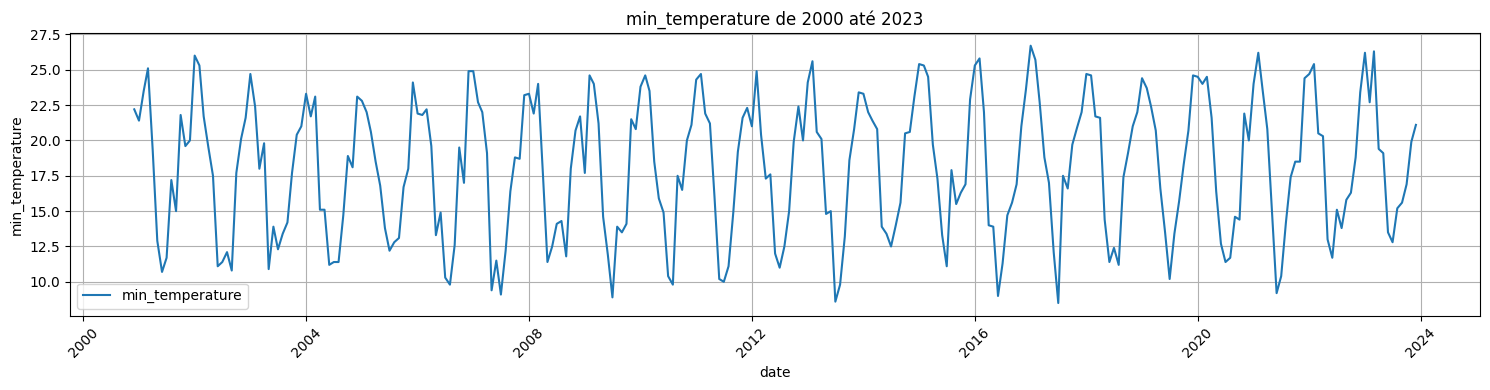

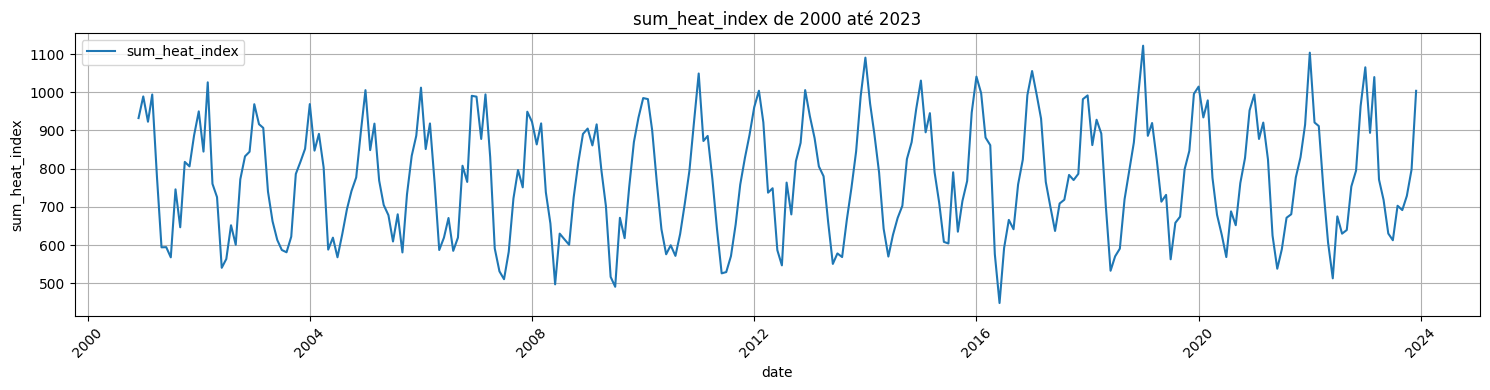

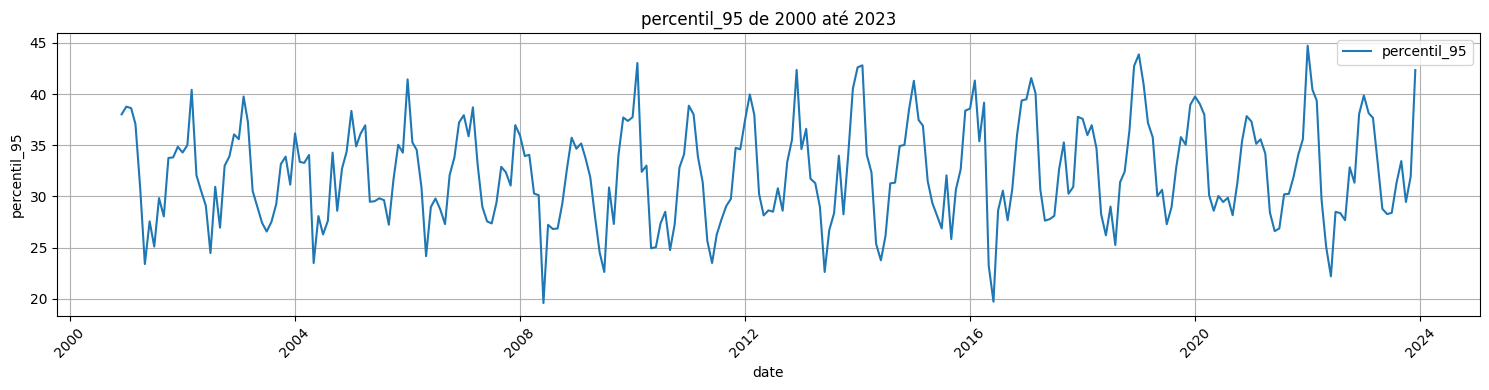

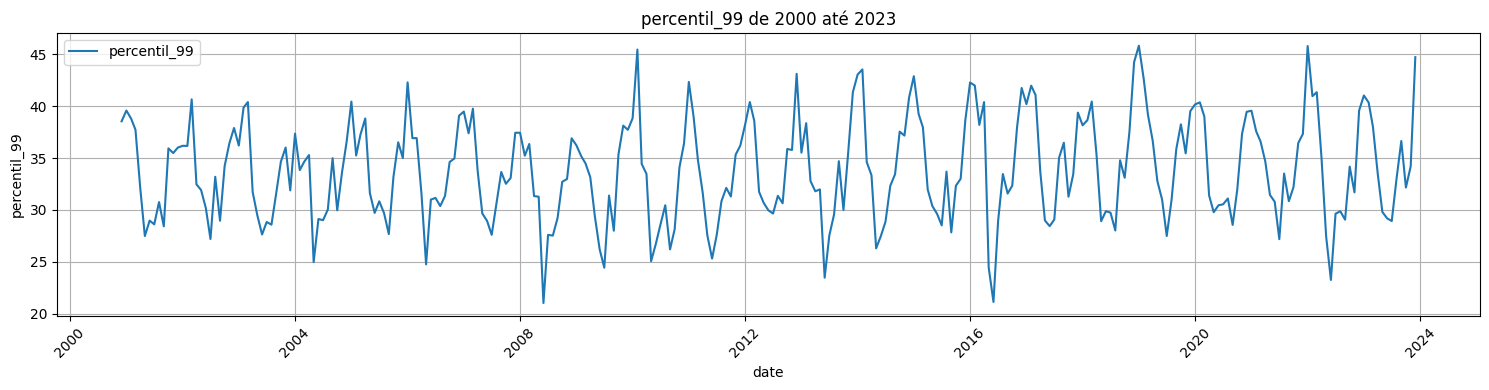

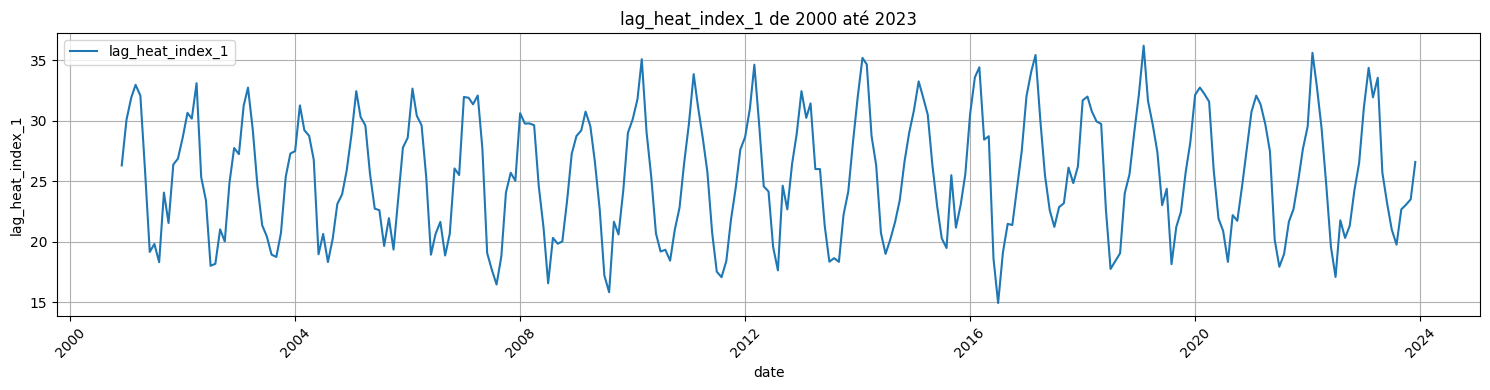

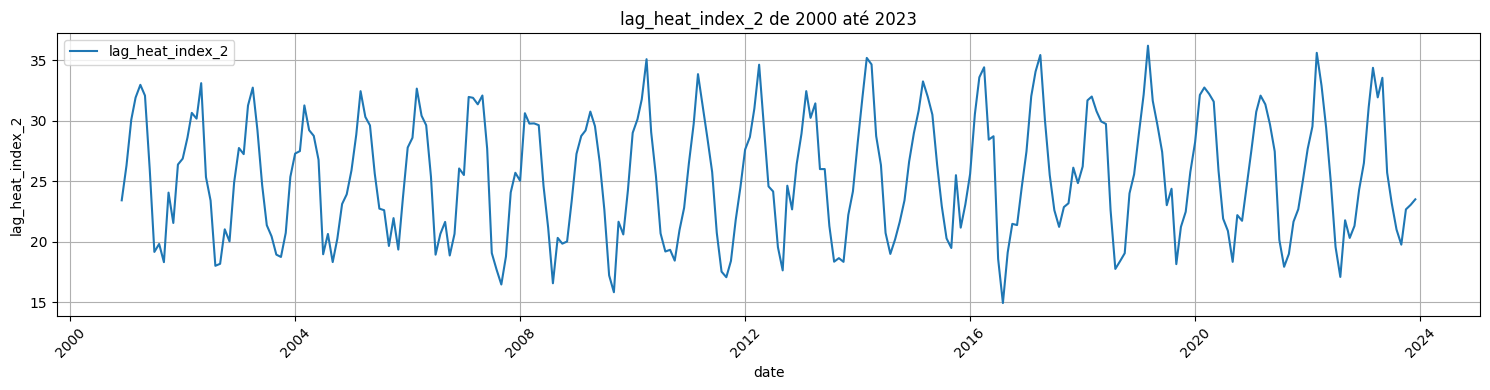

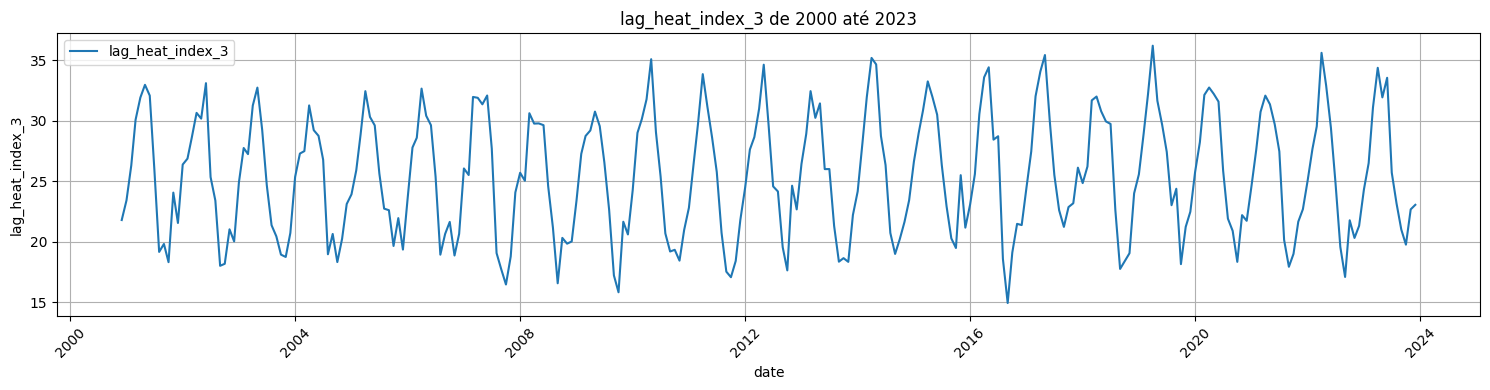

In [11]:
for feature in features_inmet:
    title = f"{feature} de 2000 até 2023"
    plot(dataset.index, dataset[feature], title, 'date', feature)

### Plot features de doenças cárdiacas

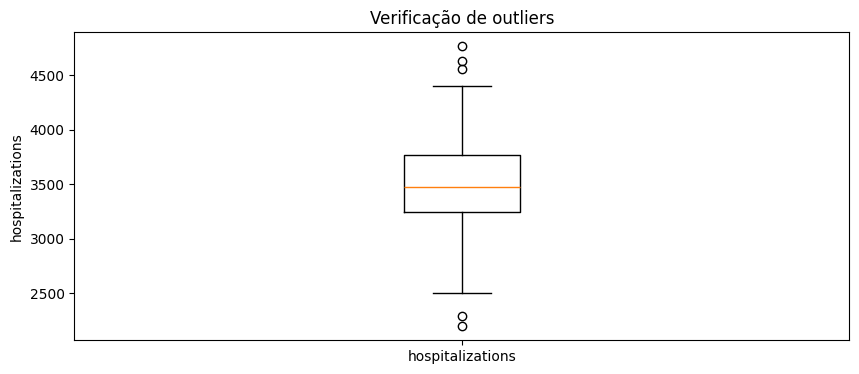

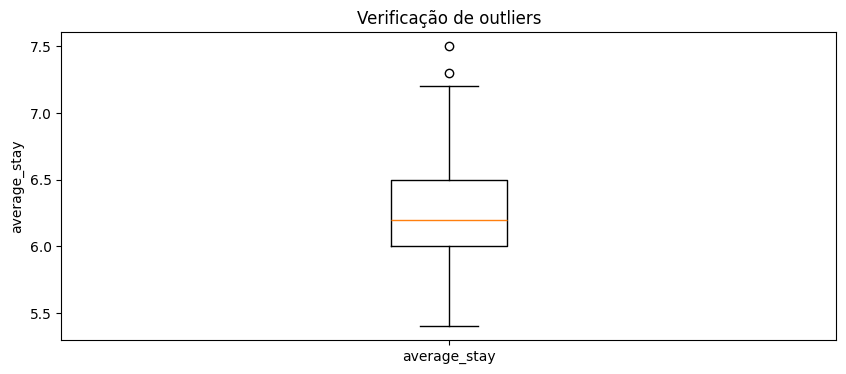

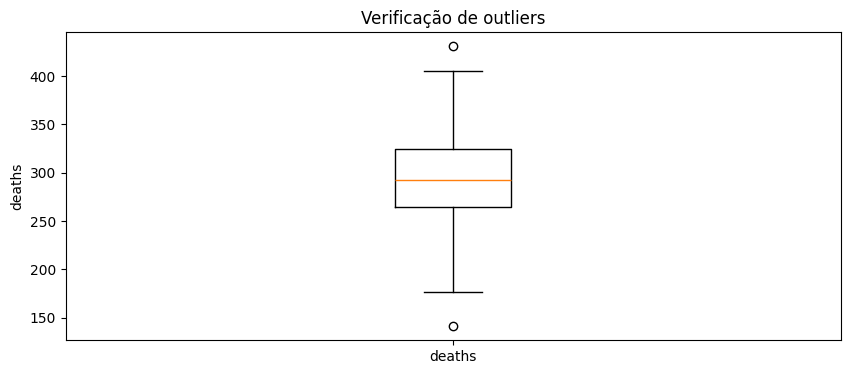

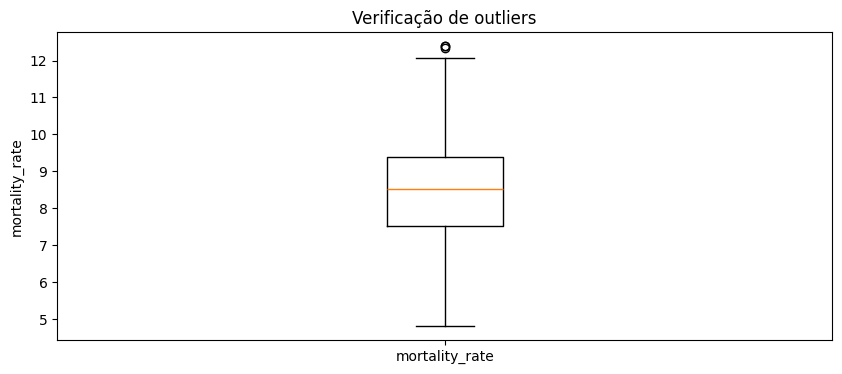

In [50]:
for feature in features_datasus:
    boxplot(dataset[feature], [feature], "Verificação de outliers", feature, figsize=(10, 4))

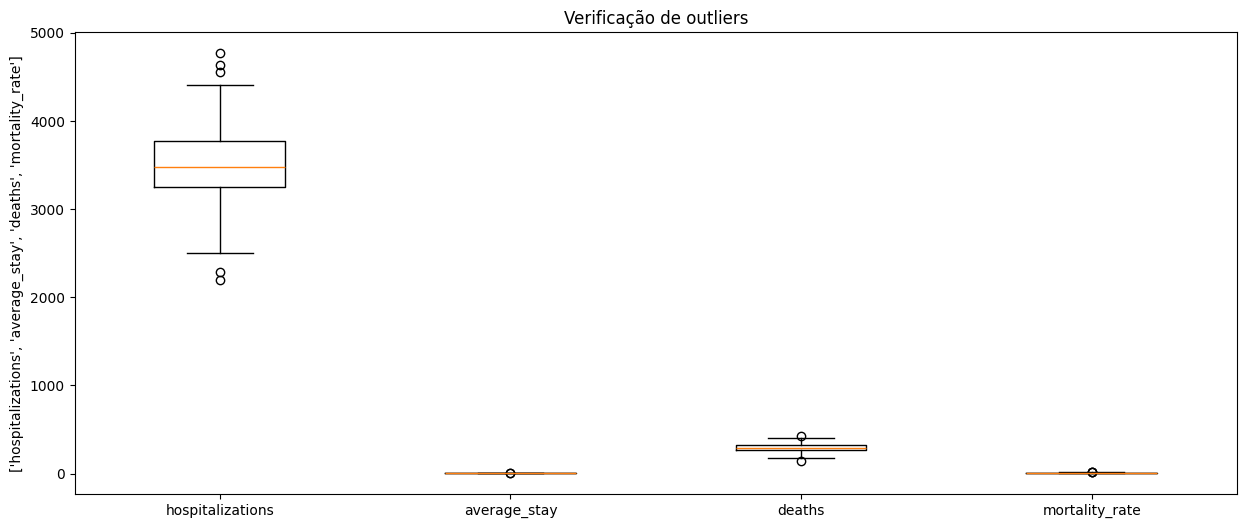

In [12]:
boxplot(dataset[features_datasus], features_datasus, "Verificação de outliers", features_datasus)

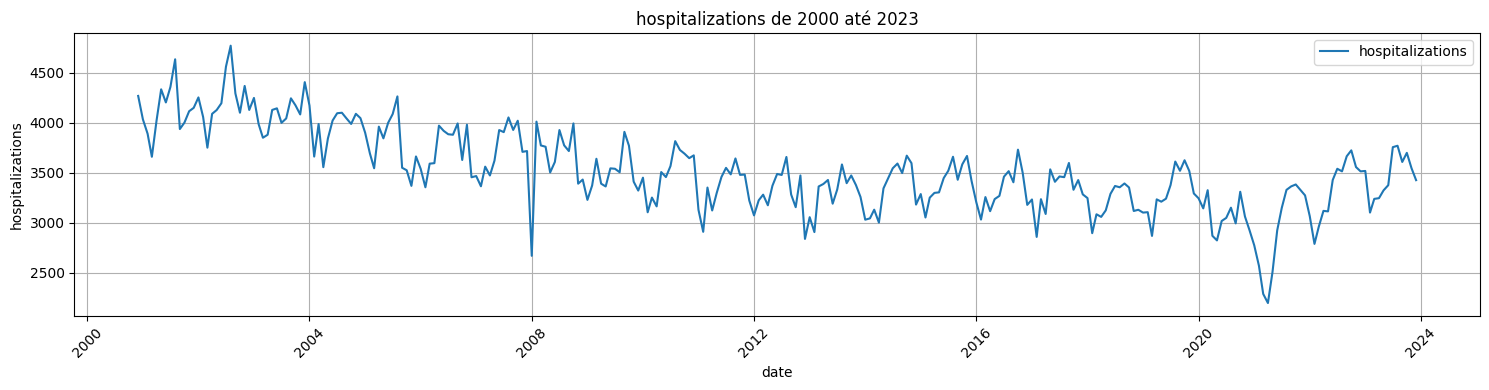

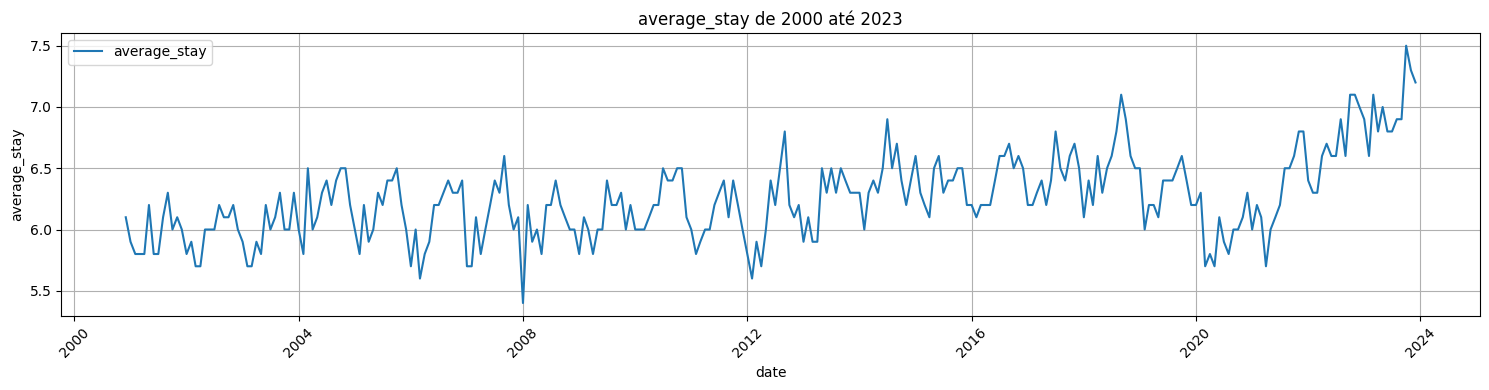

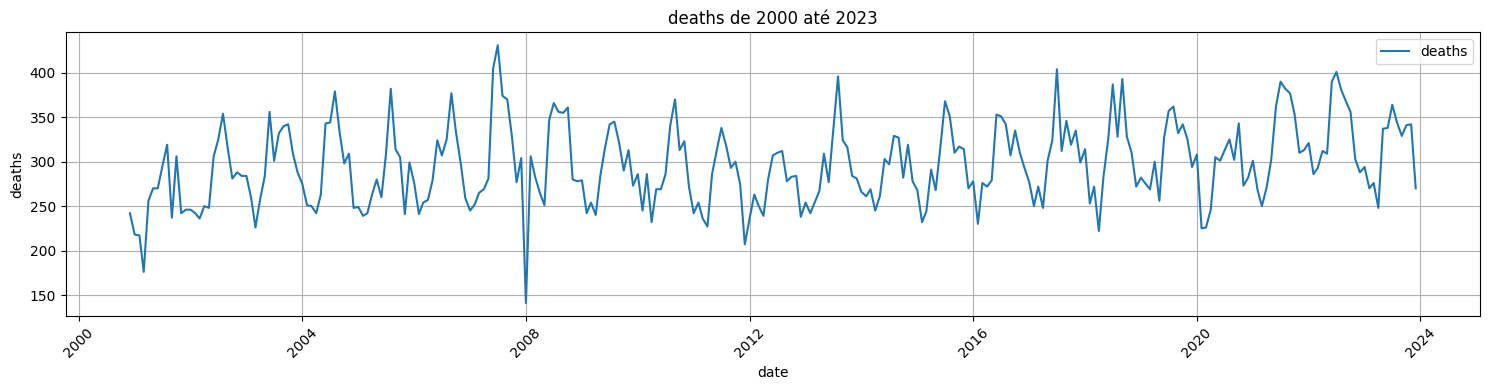

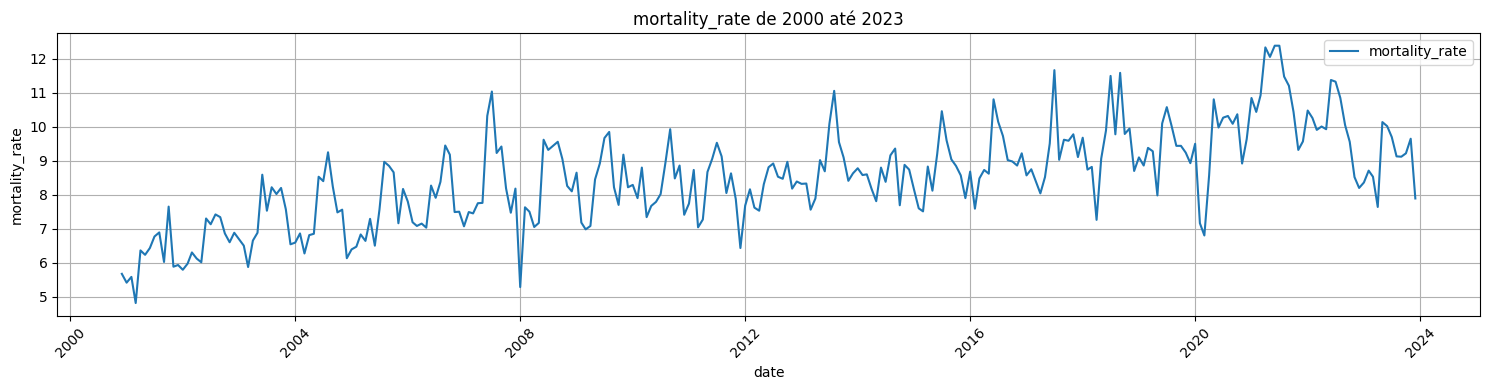

In [13]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2023"
    plot(dataset.index, dataset[feature], title, 'date', feature)

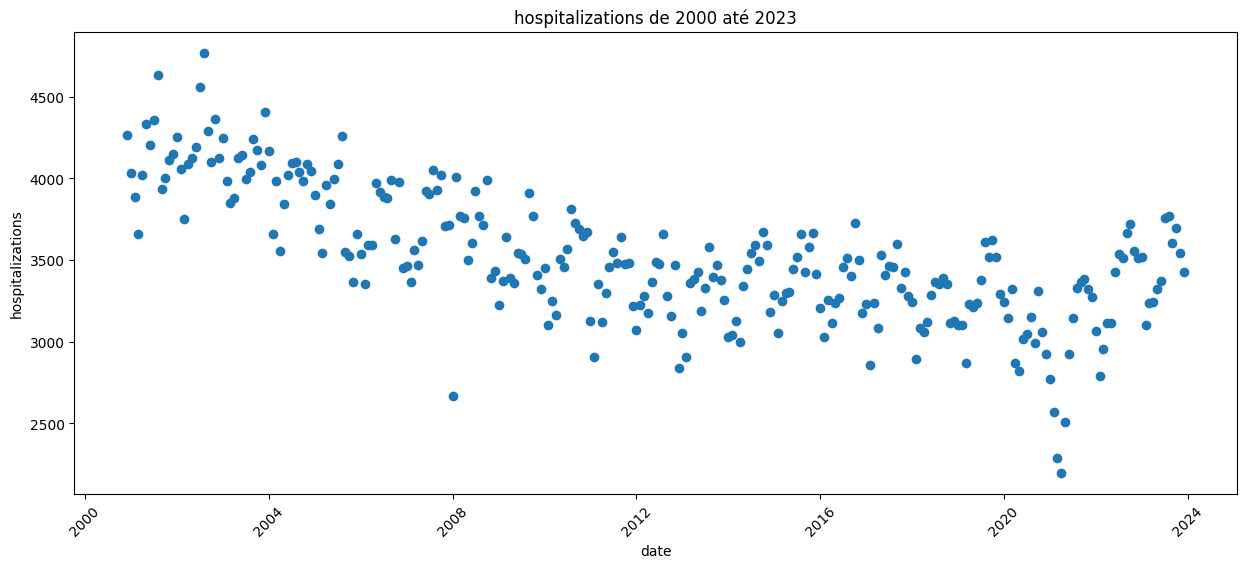

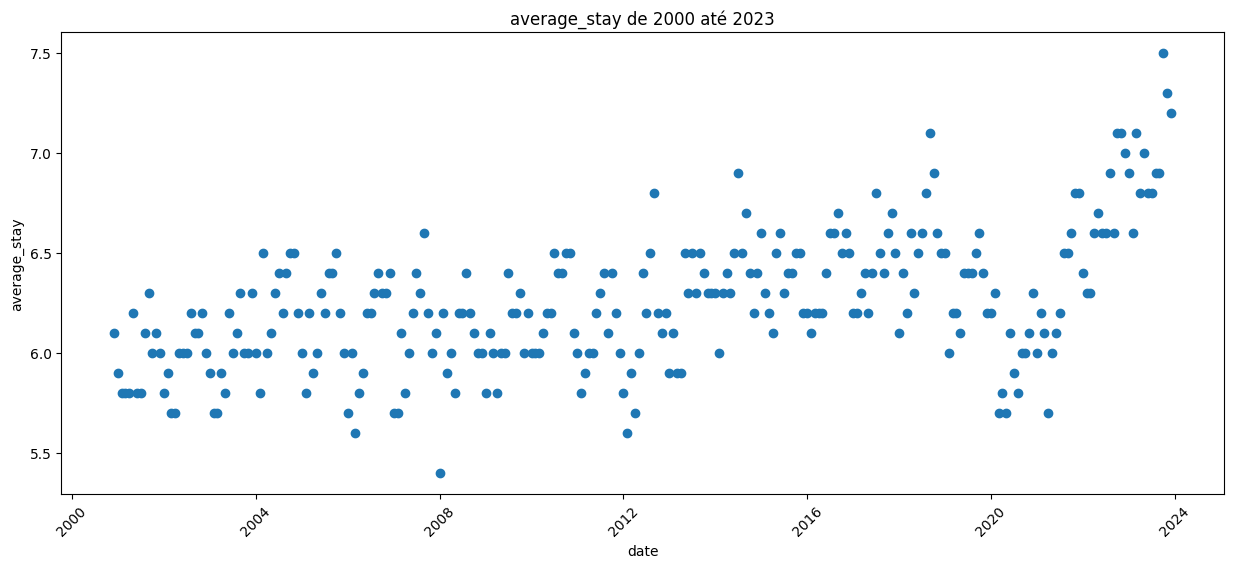

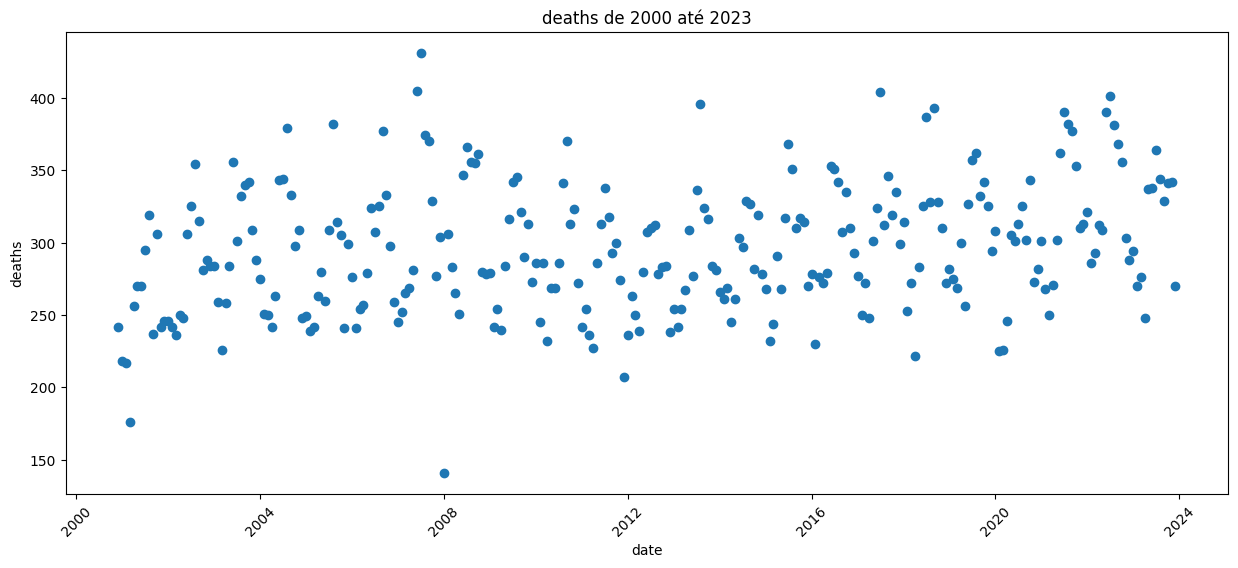

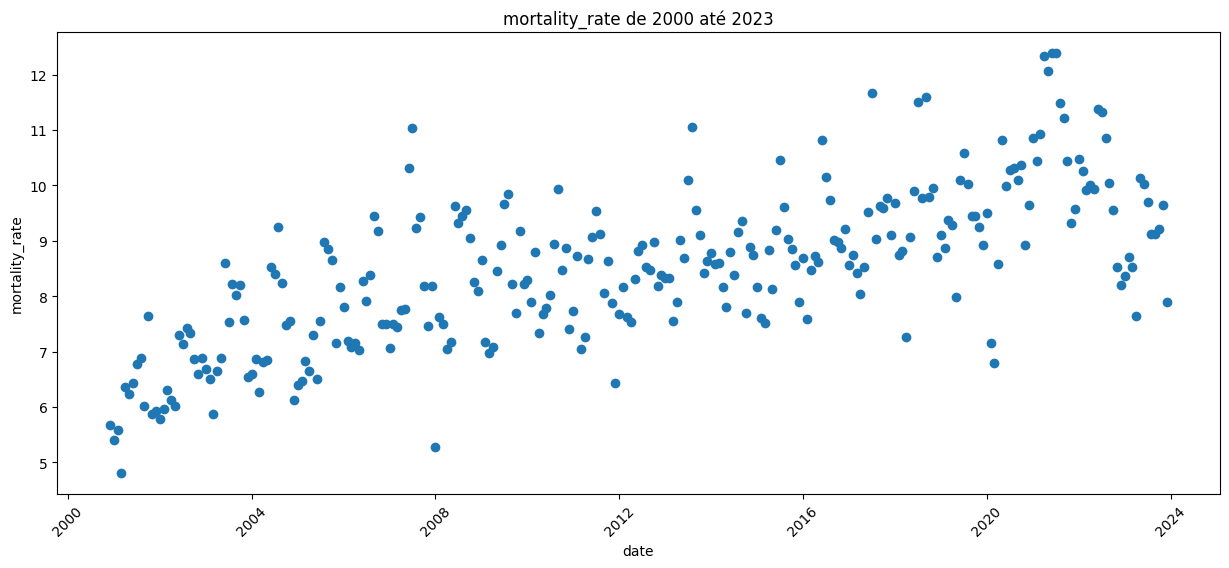

In [14]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2023"
    scatter_plot(dataset.index, dataset[feature], title, 'date', feature)

#### Análise 2008

In [15]:
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2008-12-01')

filter_2008 = dataset[(dataset.index >= start_date) & (dataset.index <= end_date)]

filter_2008[features_datasus]

,hospitalizations,average_stay,deaths,mortality_rate
date,,,,
2008-01-01,2668,5.4,141,5.28
2008-02-01,4009,6.2,306,7.63
2008-03-01,3771,5.9,283,7.50
2008-04-01,3758,6.0,265,7.05
2008-05-01,3501,5.8,251,7.17
2008-06-01,3606,6.2,347,9.62
2008-07-01,3925,6.2,366,9.32
2008-08-01,3772,6.4,356,9.44
2008-09-01,3715,6.2,355,9.56


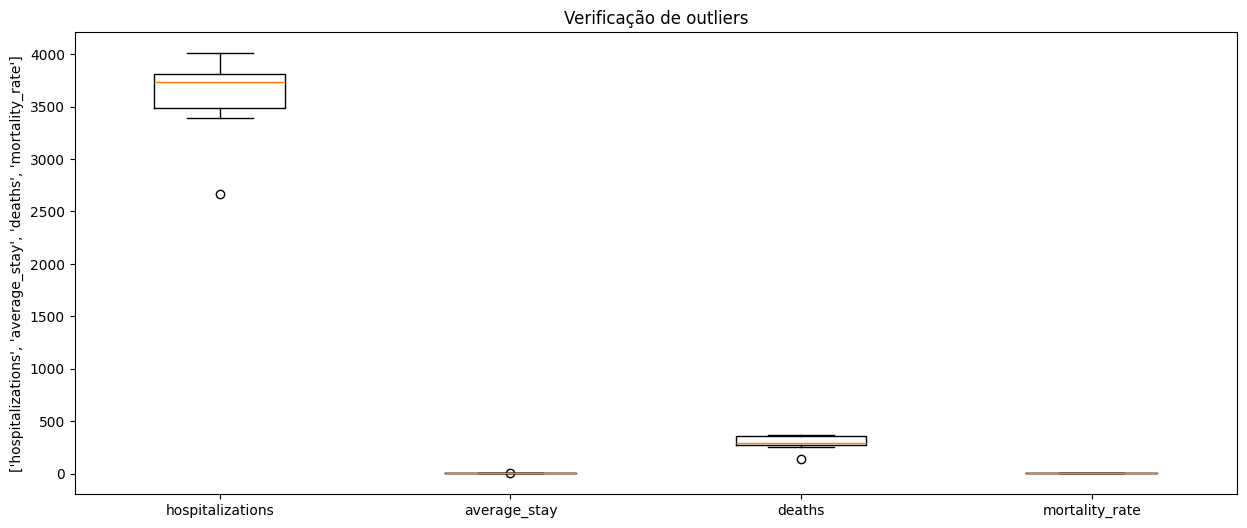

In [16]:
boxplot(filter_2008[features_datasus], features_datasus, "Verificação de outliers", features_datasus)

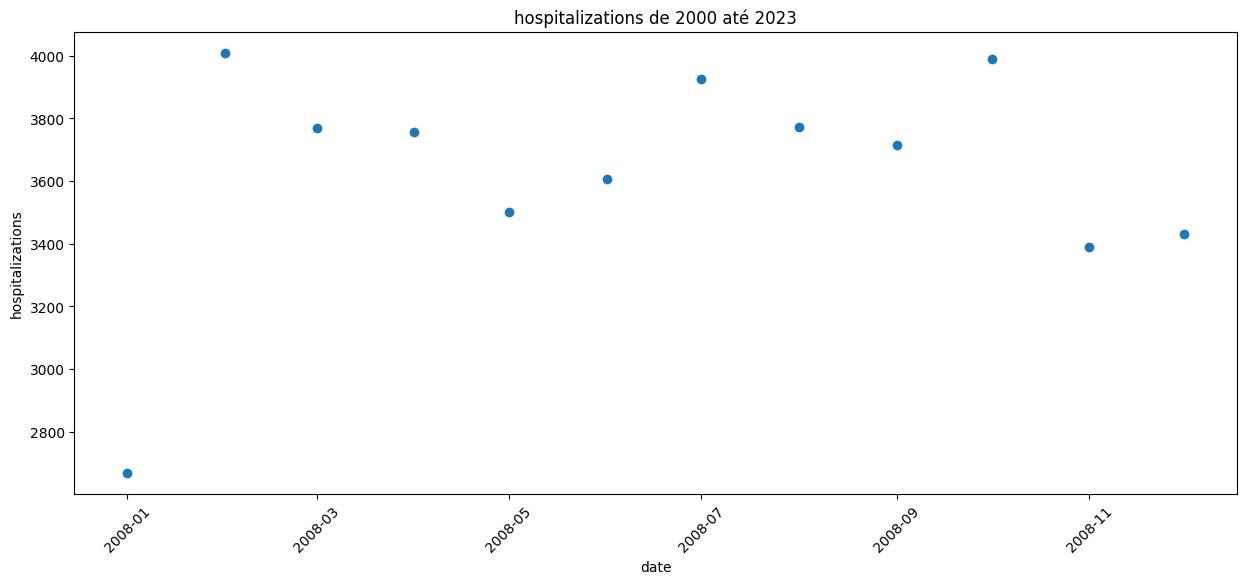

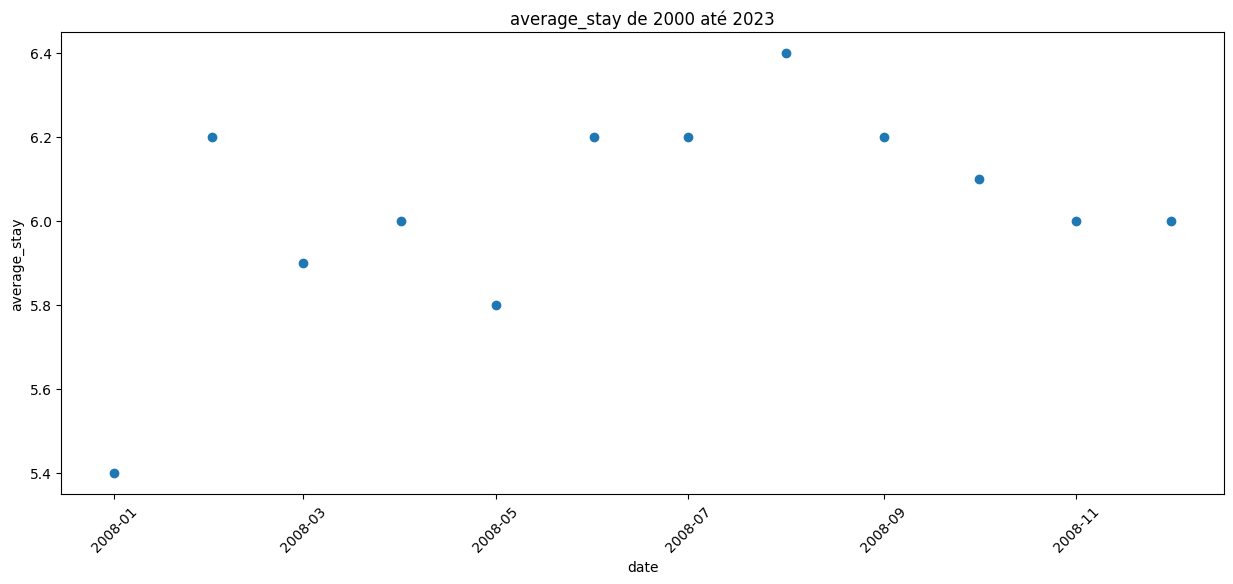

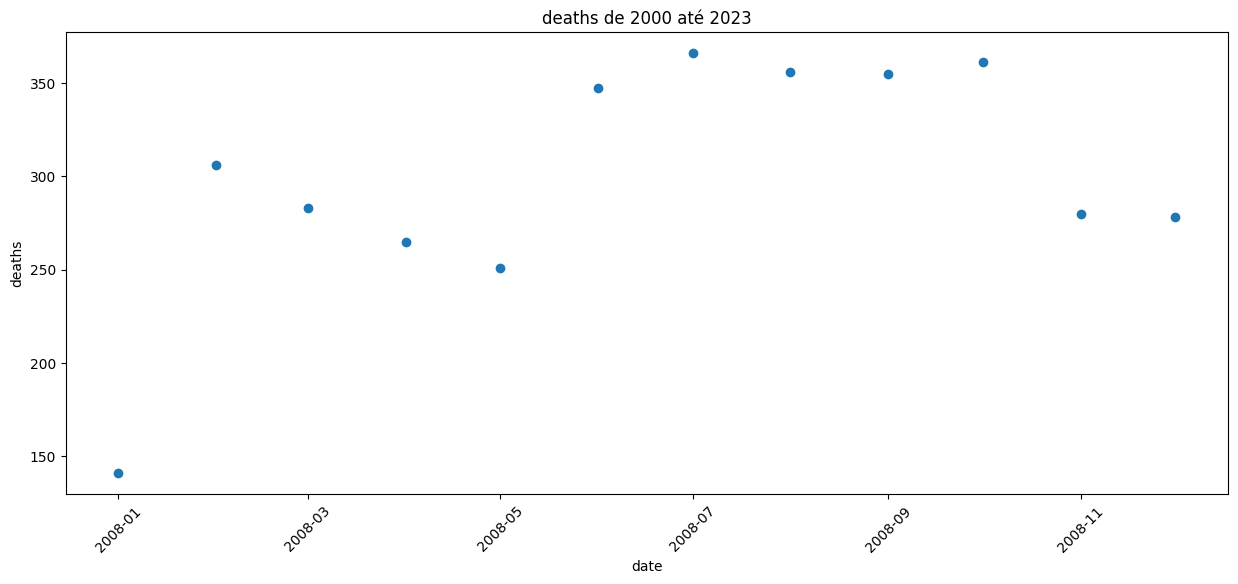

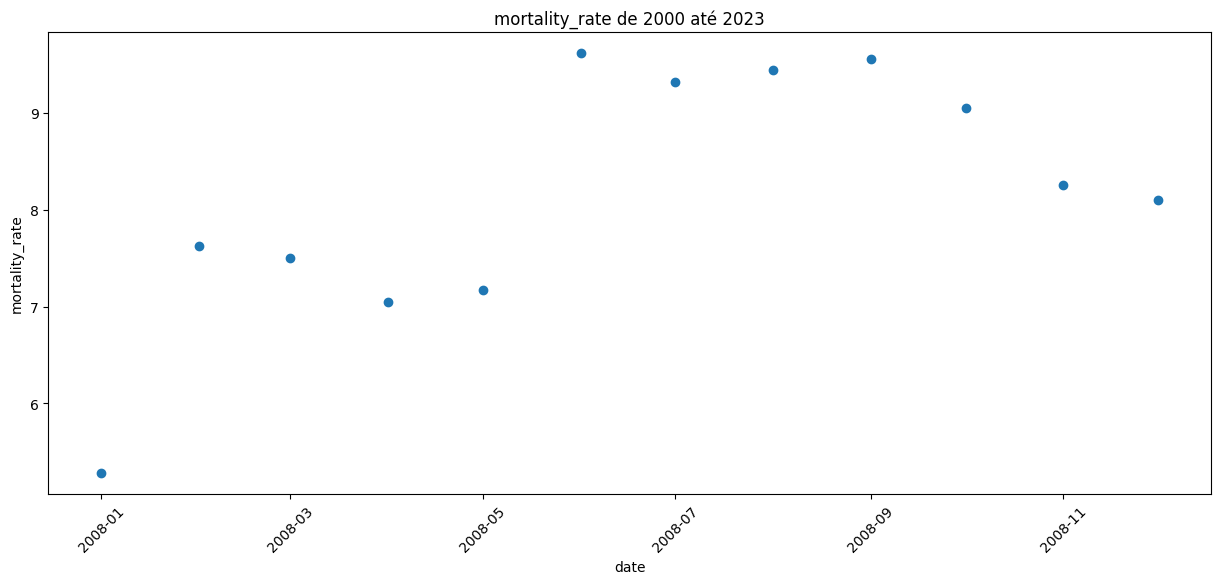

In [17]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2023"
    scatter_plot(filter_2008.index, filter_2008[feature], title, 'date', feature)

#### 2007 até 2009

In [18]:
start_date = pd.to_datetime('2007-01-01')
end_date = pd.to_datetime('2009-12-01')

filter_2007_2009 = dataset[(dataset.index >= start_date) & (dataset.index <= end_date)]

filter_2007_2009[features_datasus]

,hospitalizations,average_stay,deaths,mortality_rate
date,,,,
2007-01-01,3465,5.7,245,7.07
2007-02-01,3363,5.7,252,7.49
2007-03-01,3559,6.1,265,7.45
2007-04-01,3471,5.8,269,7.75
2007-05-01,3619,6.0,281,7.76
2007-06-01,3925,6.2,405,10.32
2007-07-01,3904,6.4,431,11.04
2007-08-01,4051,6.3,374,9.23
2007-09-01,3926,6.6,370,9.42


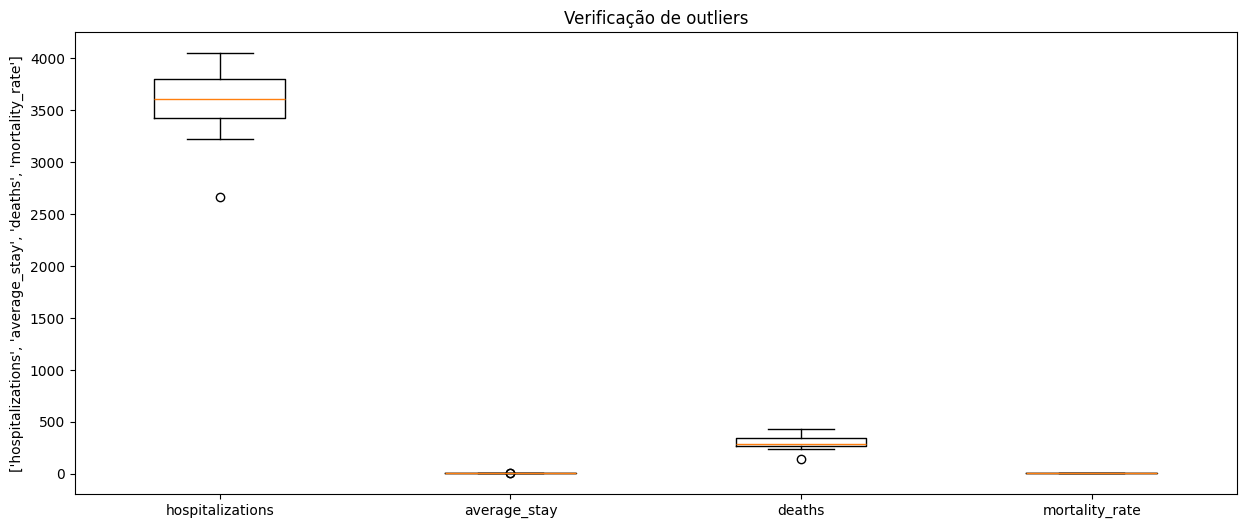

In [19]:
boxplot(filter_2007_2009[features_datasus], features_datasus, "Verificação de outliers", features_datasus)

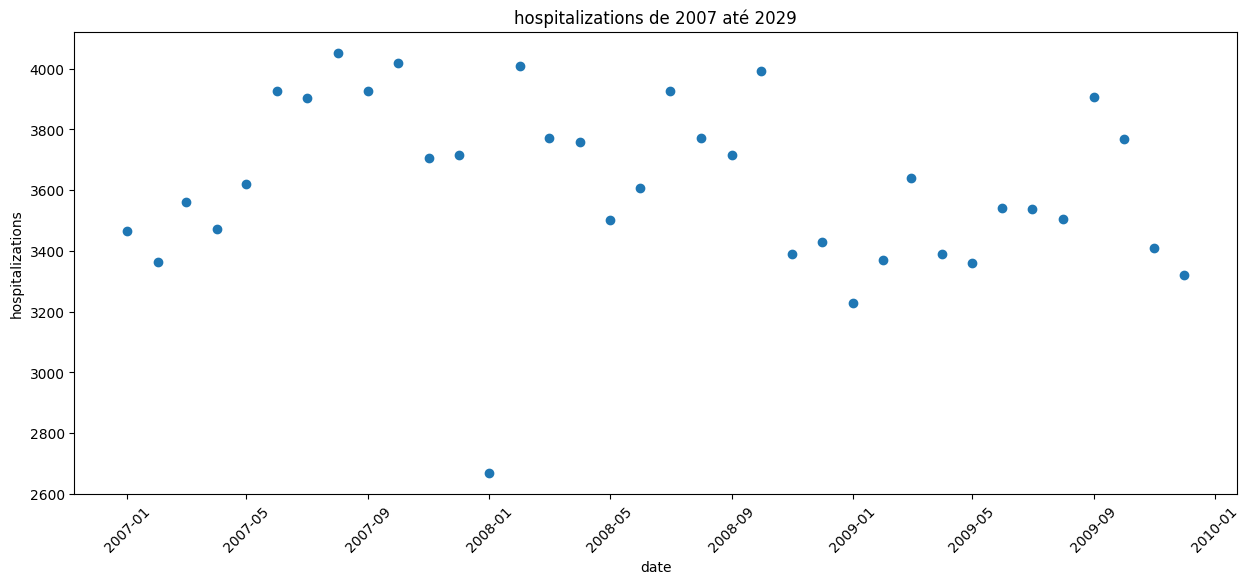

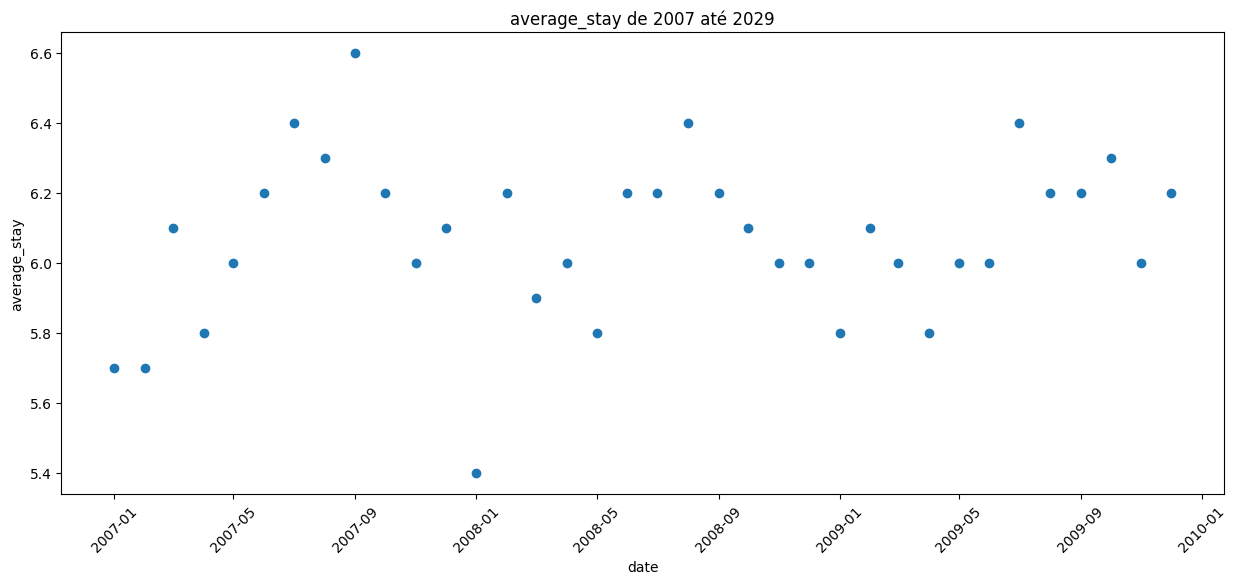

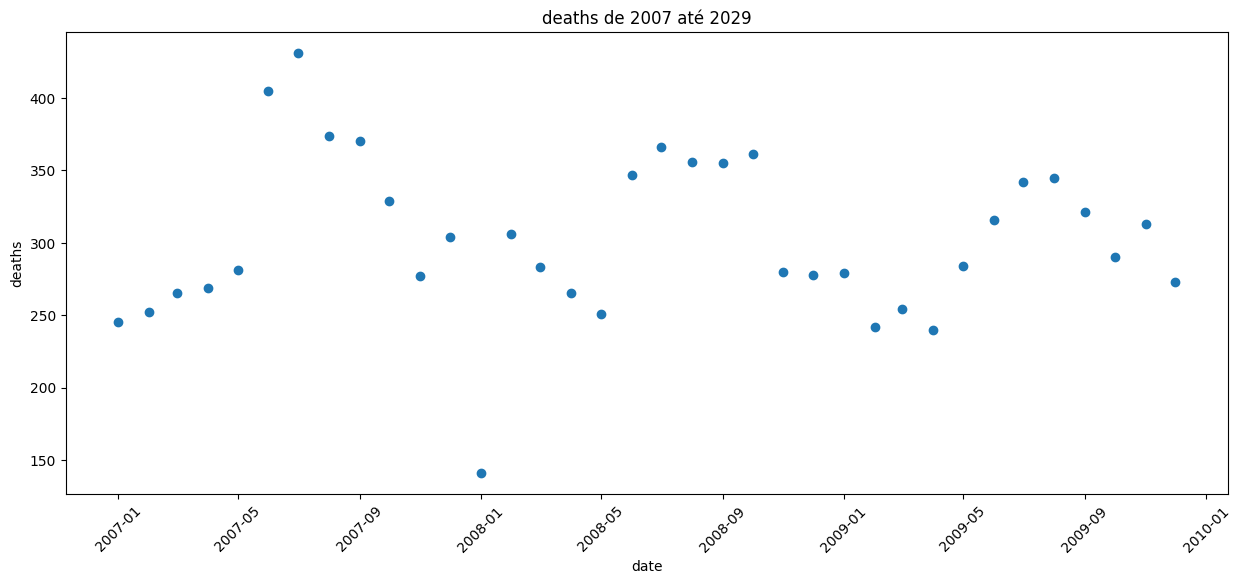

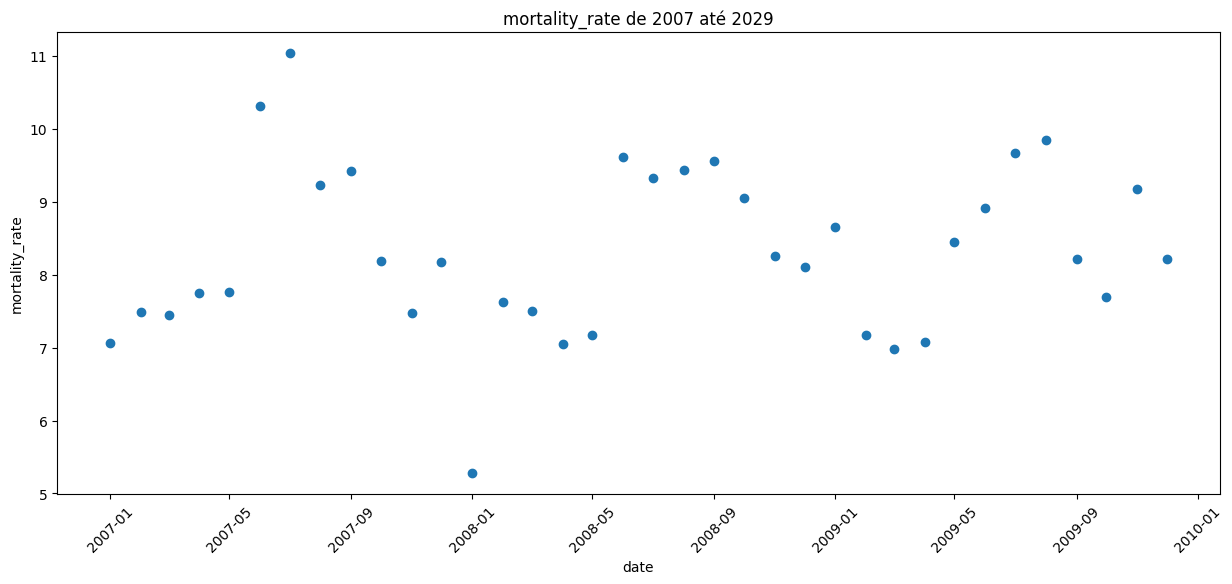

In [20]:
for feature in features_datasus:
    title = f"{feature} de 2007 até 2029"
    scatter_plot(filter_2007_2009.index, filter_2007_2009[feature], title, 'date', feature)

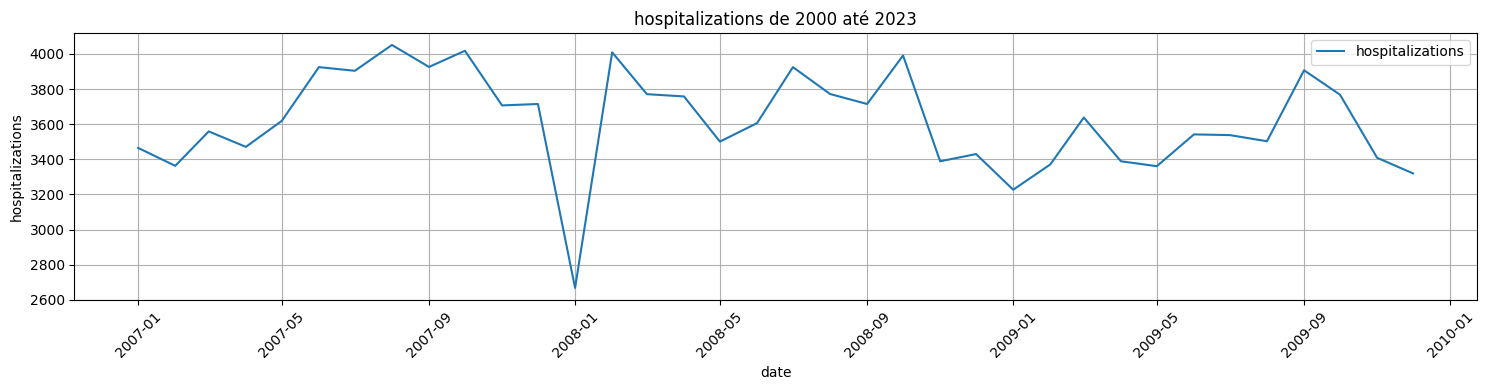

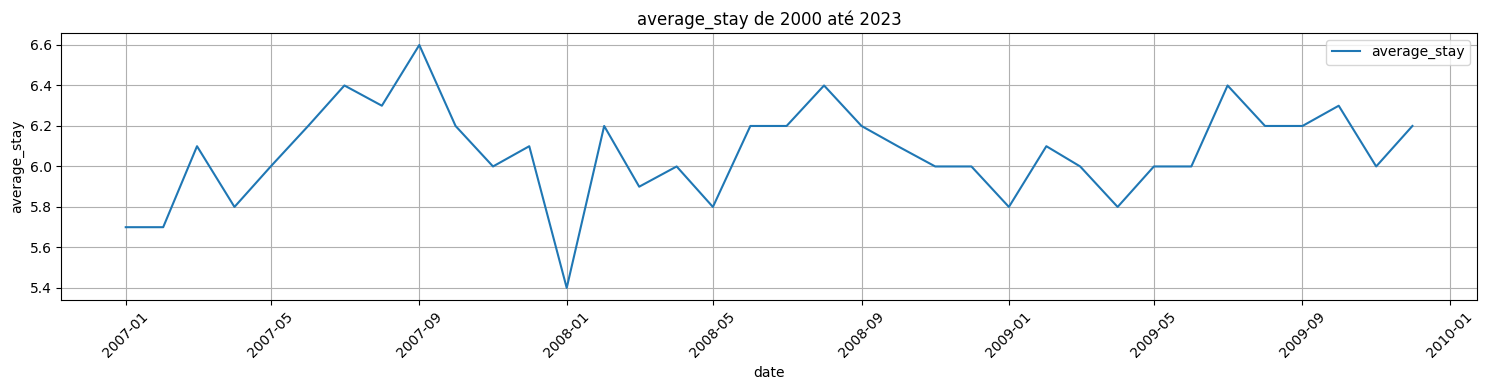

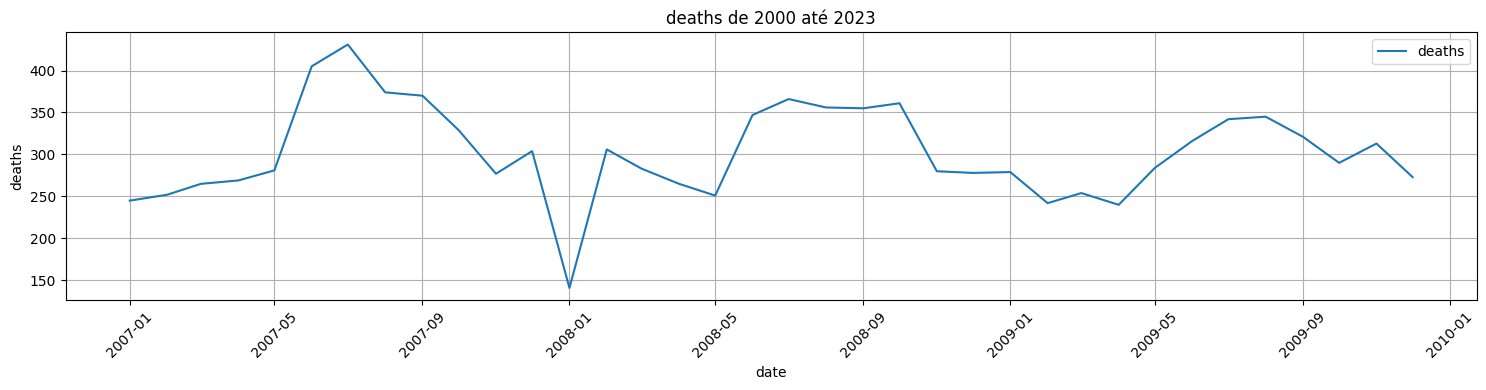

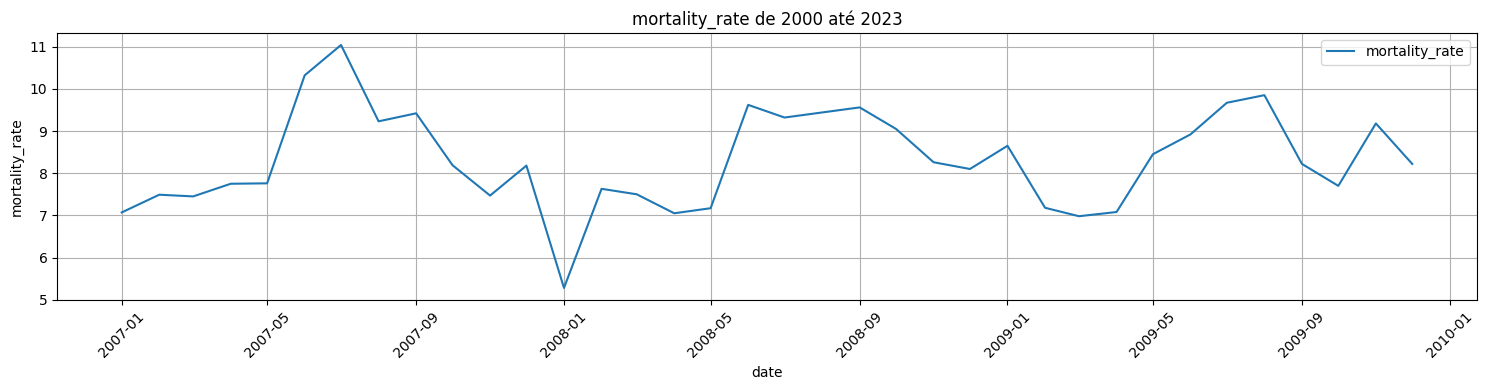

In [21]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2023"
    plot(filter_2007_2009.index, filter_2007_2009[feature], title, 'date', feature)

### Plot dados geográficos

In [51]:
url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/desmatamento_anual.csv'

anual_deforestation = pd.read_csv(url)

anual_deforestation

,date,deforestation,primary_forest_loss,favela,urbanized_area
0,2000,6164.578305,150,1865.773354,1865.773354
1,2001,6390.131585,201,1903.810075,14972.162742
2,2002,6538.818820,117,1924.922796,15107.855410
3,2003,7258.073980,576,1950.923079,15272.752609
4,2004,7407.831846,136,1989.446720,15457.576813
5,2005,7519.867752,88,2010.878137,15542.377585
6,2006,7605.074801,69,2022.755452,15608.411709
7,2007,7733.475394,74,2028.732381,15721.444812
8,2008,7836.749561,92,2039.598701,15895.963155
9,2009,7944.823728,101,2046.894035,15999.308530


In [52]:
anual_deforestation["date"] = pd.to_datetime(anual_deforestation["date"], format="%Y")
anual_deforestation = anual_deforestation.set_index("date")

anual_deforestation

,deforestation,primary_forest_loss,favela,urbanized_area
date,,,,
2000-01-01,6164.578305,150,1865.773354,1865.773354
2001-01-01,6390.131585,201,1903.810075,14972.162742
2002-01-01,6538.818820,117,1924.922796,15107.855410
2003-01-01,7258.073980,576,1950.923079,15272.752609
2004-01-01,7407.831846,136,1989.446720,15457.576813
2005-01-01,7519.867752,88,2010.878137,15542.377585
2006-01-01,7605.074801,69,2022.755452,15608.411709
2007-01-01,7733.475394,74,2028.732381,15721.444812
2008-01-01,7836.749561,92,2039.598701,15895.963155


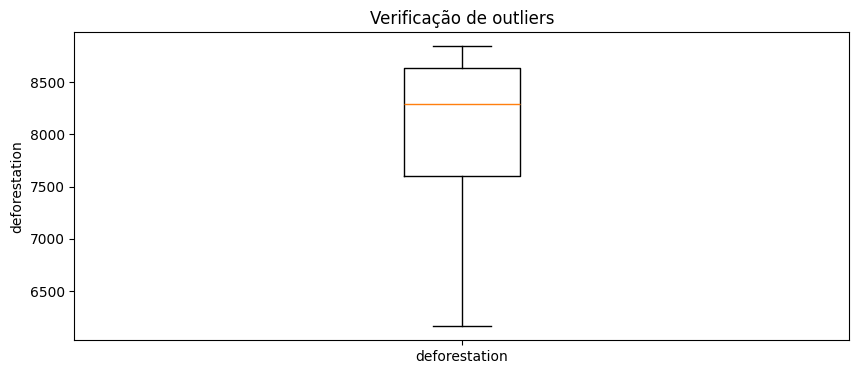

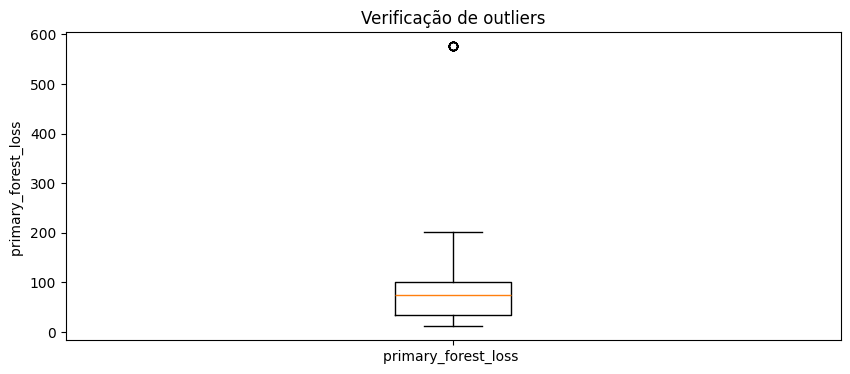

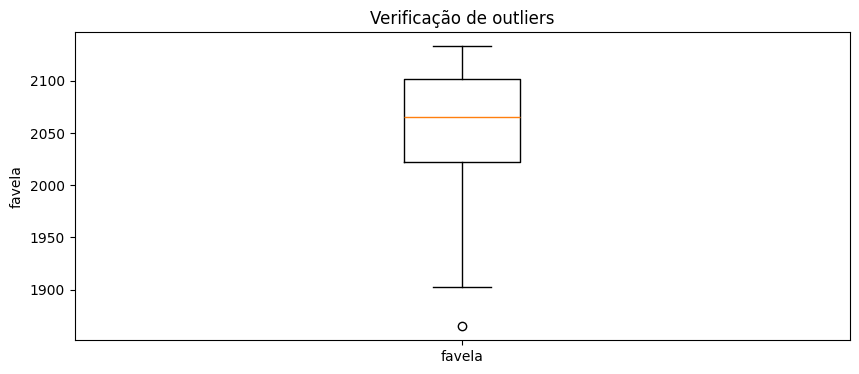

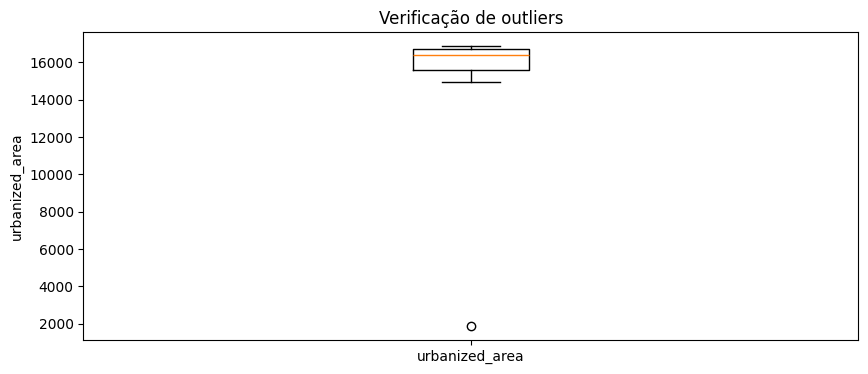

In [53]:
for feature in features_map_biomas:
    boxplot(dataset[feature], [feature], "Verificação de outliers", feature, figsize=(10, 4))

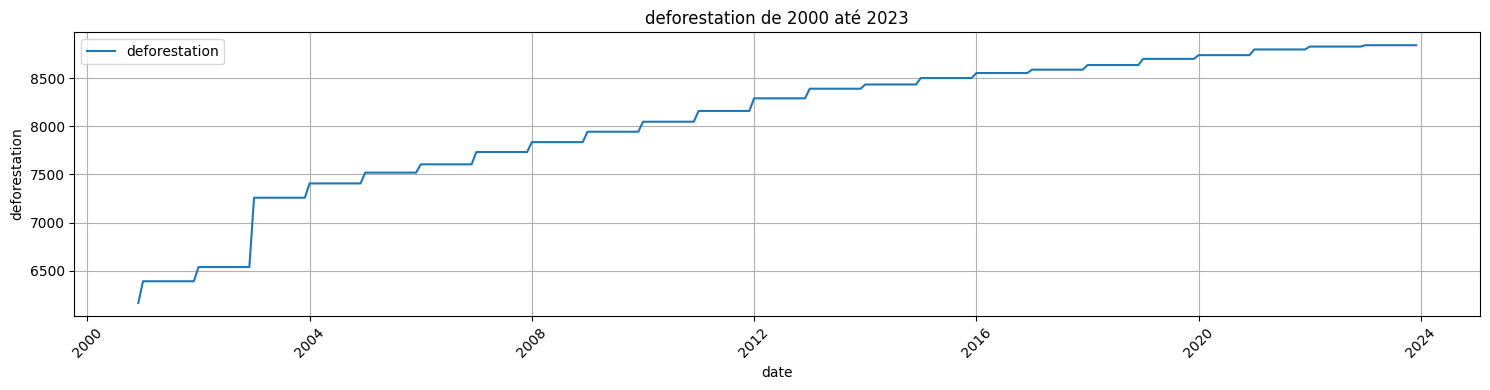

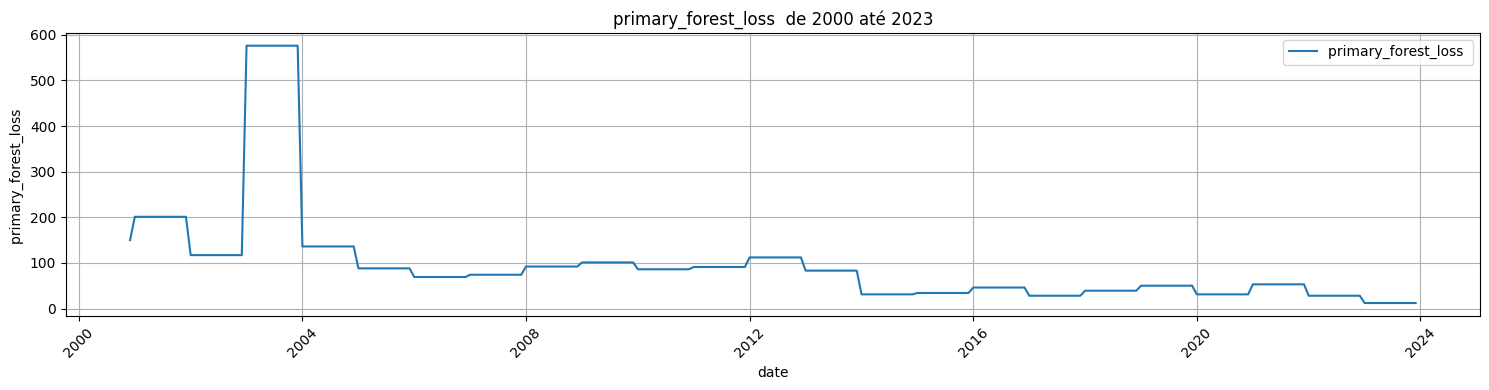

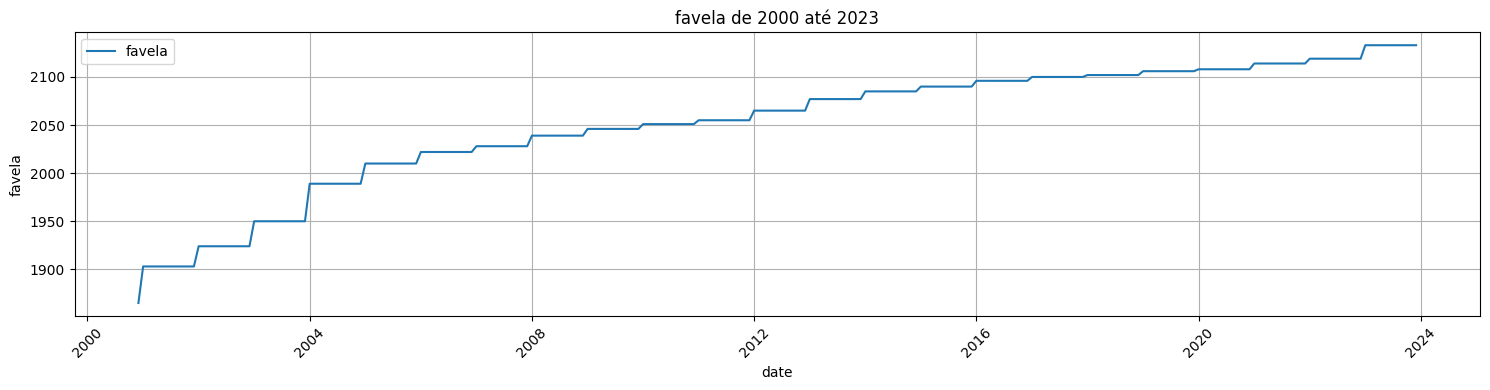

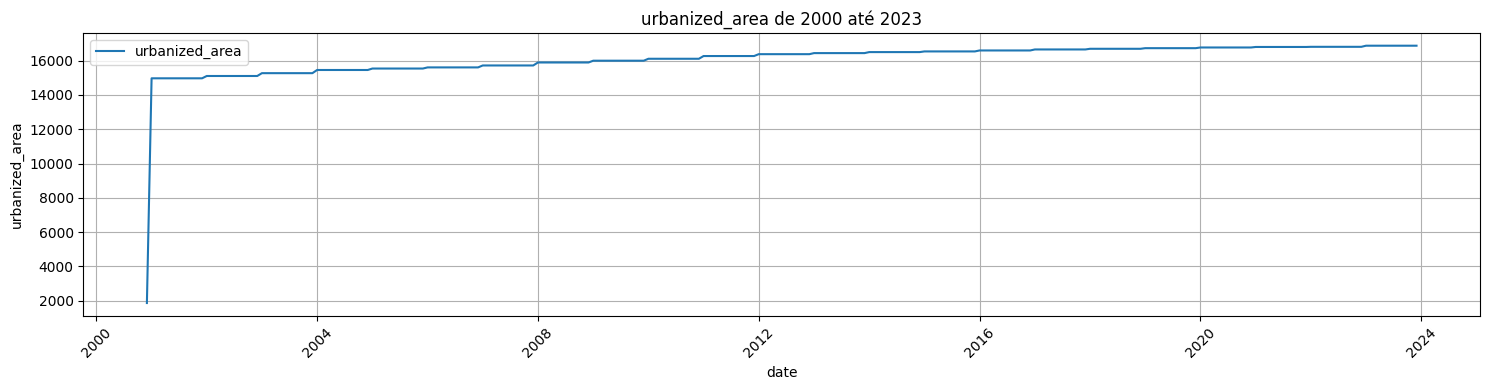

In [55]:
for feature in features_map_biomas:
    title = f"{feature} de 2000 até 2023"
    plot(dataset.index, dataset[feature], title, 'date', feature)

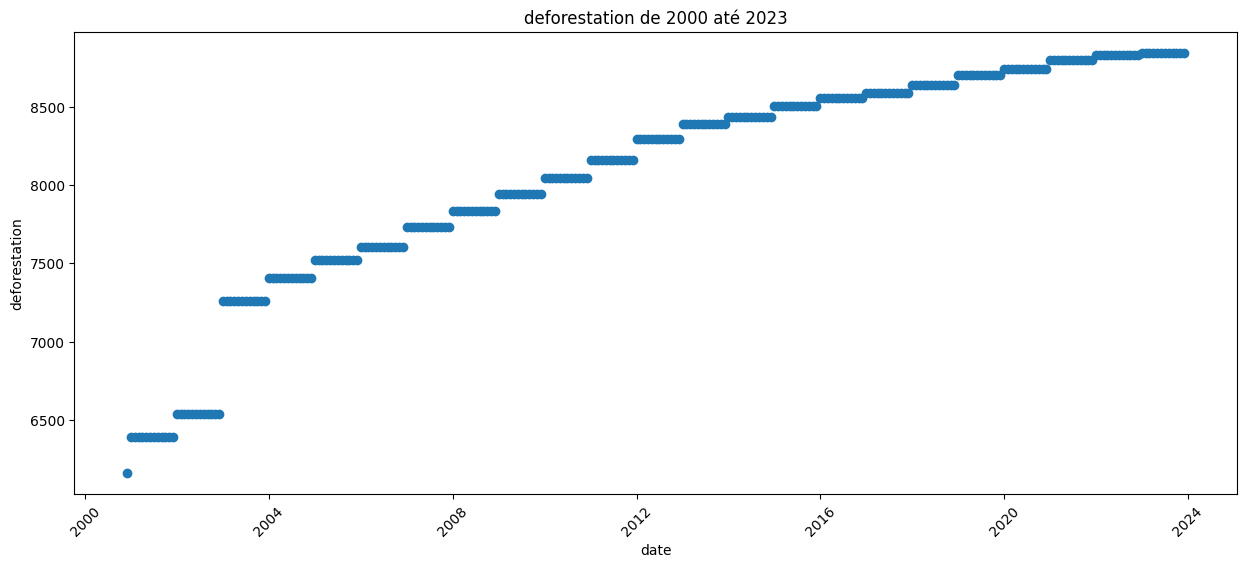

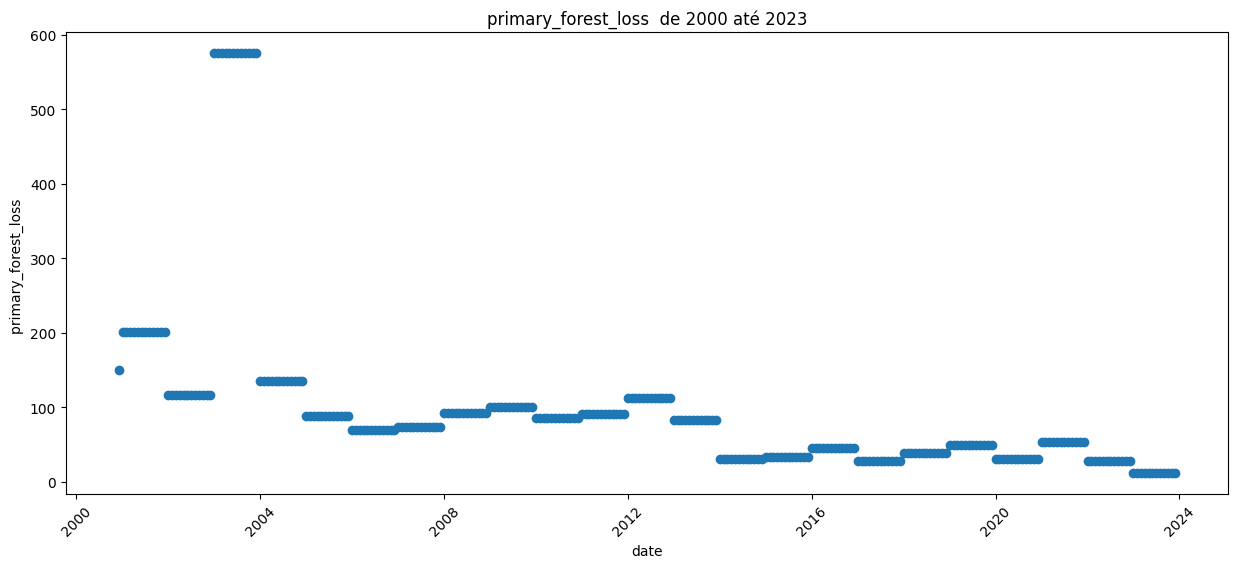

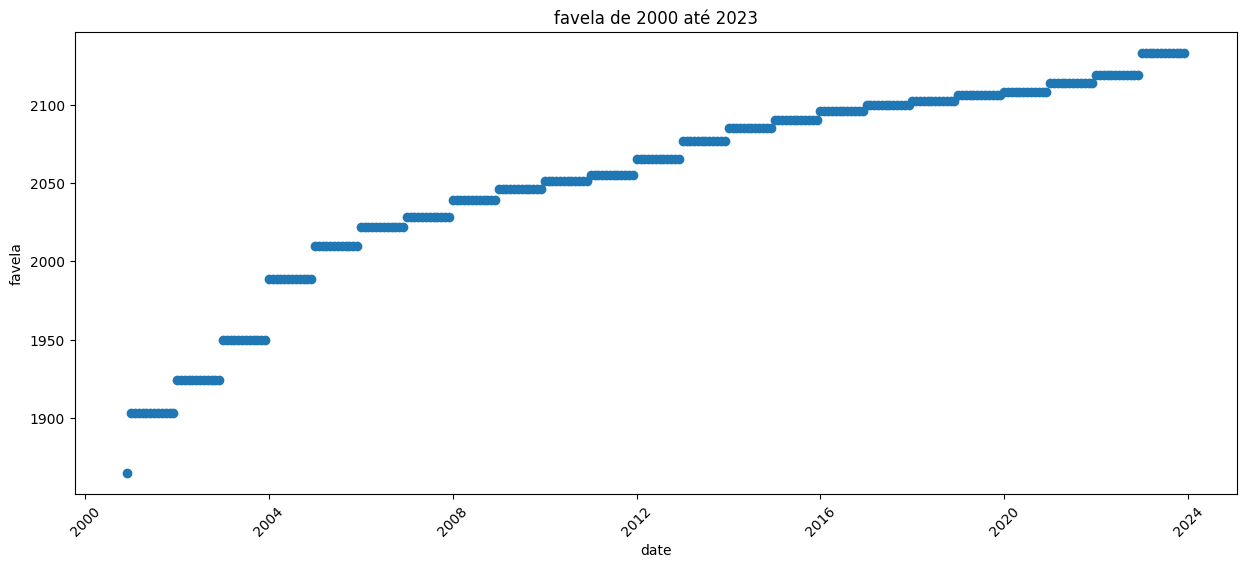

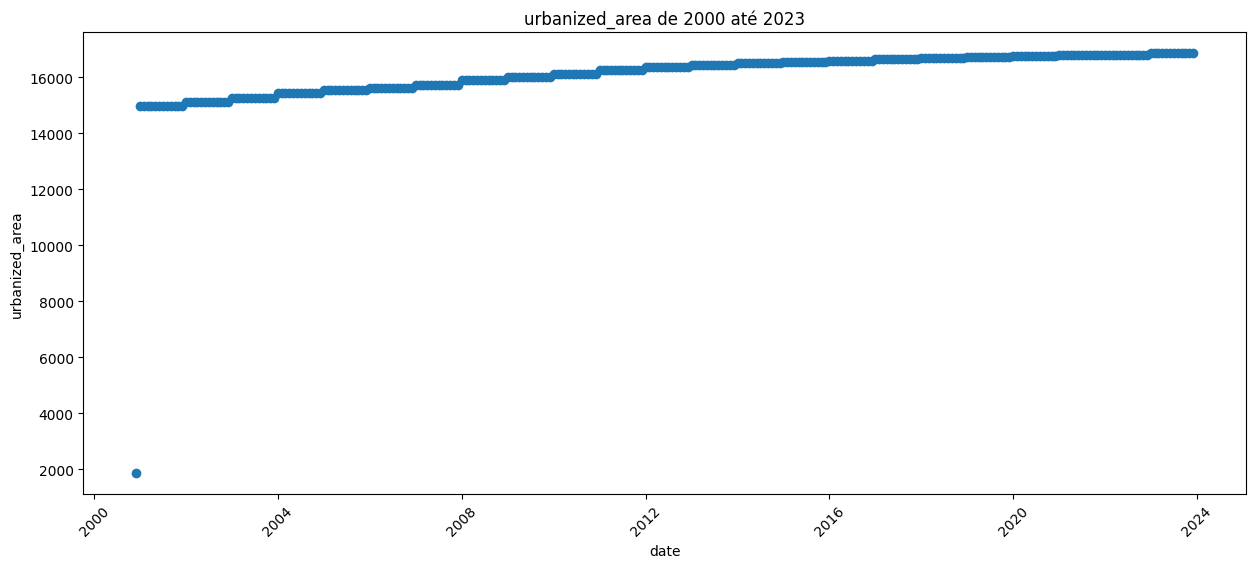

In [56]:
for feature in features_map_biomas:
    title = f"{feature} de 2000 até 2023"
    scatter_plot(dataset.index, dataset[feature], title, 'date', feature)